In [1]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import time

URL_FILMS_BASE = 'https://www.imdb.com'
URL_FILMS_LISTE = '/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=ZEZSWF427KDNCR9JF090&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1'

# Récupérer les url de tous les films

In [2]:
def get_html_from_link(page_link):
    '''
        Get HTML from web page and parse it.

        :param page_link: link of the webpage we want to scrap
        :type page_link: string
        :return: BeautifulSoup object (HTML parsed)
        :rtype: bs4.BeautifulSoup
    '''

    # TODO Code this function
    html = requests.get(page_link)
    soup = BeautifulSoup(html.text)
    return soup

In [3]:

page_link = f'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
print(get_html_from_link(page_link).prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb Top 250 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {w

In [4]:
HTML = get_html_from_link(page_link)


In [5]:
liste = HTML.find_all("a", href = True)
print(liste)

[<a href="/?ref_=nv_home"><svg class="ipc-logo WNY8DBPCS1ZbiSd7NoqdP" height="56" version="1.1" viewbox="0 0 64 32" width="98" xmlns="http://www.w3.org/2000/svg"><g fill="#F5C518"><rect height="100%" rx="4" width="100%" x="0" y="0"></rect></g><g fill="#000000" fill-rule="nonzero" transform="translate(8.000000, 7.000000)"><polygon points="0 18 5 18 5 0 0 0"></polygon><path d="M15.6725178,0 L14.5534833,8.40846934 L13.8582008,3.83502426 C13.65661,2.37009263 13.4632474,1.09175121 13.278113,0 L7,0 L7,18 L11.2416347,18 L11.2580911,6.11380679 L13.0436094,18 L16.0633571,18 L17.7583653,5.8517865 L17.7707076,18 L22,18 L22,0 L15.6725178,0 Z"></path><path d="M24,18 L24,0 L31.8045586,0 C33.5693522,0 35,1.41994415 35,3.17660424 L35,14.8233958 C35,16.5777858 33.5716617,18 31.8045586,18 L24,18 Z M29.8322479,3.2395236 C29.6339219,3.13233348 29.2545158,3.08072342 28.7026524,3.08072342 L28.7026524,14.8914865 C29.4312846,14.8914865 29.8796736,14.7604764 30.0478195,14.4865461 C30.2159654,14.2165858 30.3021

In [6]:
def get_links_to_films(root_html):
    '''
        Extract book links from URL_BOOK_LISTE

        :param root_html: BeautifulSoup Element that contains all books links
        :type book_html: bs4.BeautifulSoup
        :return: List of all book links in the page
        :rtype: list(str)
    '''
    films_links = []
    all_href = root_html.find_all("a", href=True)
    for i in all_href:
        if"/title/" in i["href"]:
            films_links.append(i["href"])
    # TODO Append to books_links all the links refering to Books you may find on this page.
    # First find all links
    # Then filter the links to keep only relevent ones
    # May note that they all start with /livres/
    return films_links

In [7]:
html = get_html_from_link(page_link)
films_links = get_links_to_films(html)
films_links

['https://www.imdb.com/search/title/?count=100&groups=oscar_best_picture_winners&sort=year%2Cdesc&ref_=nv_ch_osc',
 '/title/tt0111161/',
 '/title/tt0111161/',
 '/title/tt0068646/',
 '/title/tt0068646/',
 '/title/tt0071562/',
 '/title/tt0071562/',
 '/title/tt0468569/',
 '/title/tt0468569/',
 '/title/tt0050083/',
 '/title/tt0050083/',
 '/title/tt0108052/',
 '/title/tt0108052/',
 '/title/tt0167260/',
 '/title/tt0167260/',
 '/title/tt0110912/',
 '/title/tt0110912/',
 '/title/tt0060196/',
 '/title/tt0060196/',
 '/title/tt0120737/',
 '/title/tt0120737/',
 '/title/tt0137523/',
 '/title/tt0137523/',
 '/title/tt0109830/',
 '/title/tt0109830/',
 '/title/tt1375666/',
 '/title/tt1375666/',
 '/title/tt0167261/',
 '/title/tt0167261/',
 '/title/tt0080684/',
 '/title/tt0080684/',
 '/title/tt0133093/',
 '/title/tt0133093/',
 '/title/tt0099685/',
 '/title/tt0099685/',
 '/title/tt0073486/',
 '/title/tt0073486/',
 '/title/tt0047478/',
 '/title/tt0047478/',
 '/title/tt0114369/',
 '/title/tt0114369/',
 '/ti

In [8]:
elementSupprime = films_links.pop(0)
print(films_links)

['/title/tt0111161/', '/title/tt0111161/', '/title/tt0068646/', '/title/tt0068646/', '/title/tt0071562/', '/title/tt0071562/', '/title/tt0468569/', '/title/tt0468569/', '/title/tt0050083/', '/title/tt0050083/', '/title/tt0108052/', '/title/tt0108052/', '/title/tt0167260/', '/title/tt0167260/', '/title/tt0110912/', '/title/tt0110912/', '/title/tt0060196/', '/title/tt0060196/', '/title/tt0120737/', '/title/tt0120737/', '/title/tt0137523/', '/title/tt0137523/', '/title/tt0109830/', '/title/tt0109830/', '/title/tt1375666/', '/title/tt1375666/', '/title/tt0167261/', '/title/tt0167261/', '/title/tt0080684/', '/title/tt0080684/', '/title/tt0133093/', '/title/tt0133093/', '/title/tt0099685/', '/title/tt0099685/', '/title/tt0073486/', '/title/tt0073486/', '/title/tt0047478/', '/title/tt0047478/', '/title/tt0114369/', '/title/tt0114369/', '/title/tt0102926/', '/title/tt0102926/', '/title/tt0317248/', '/title/tt0317248/', '/title/tt0038650/', '/title/tt0038650/', '/title/tt0118799/', '/title/tt01

In [9]:
new_list = []

for i in films_links :
    if i not in new_list:
        new_list.append(i)
        
print(new_list)

['/title/tt0111161/', '/title/tt0068646/', '/title/tt0071562/', '/title/tt0468569/', '/title/tt0050083/', '/title/tt0108052/', '/title/tt0167260/', '/title/tt0110912/', '/title/tt0060196/', '/title/tt0120737/', '/title/tt0137523/', '/title/tt0109830/', '/title/tt1375666/', '/title/tt0167261/', '/title/tt0080684/', '/title/tt0133093/', '/title/tt0099685/', '/title/tt0073486/', '/title/tt0047478/', '/title/tt0114369/', '/title/tt0102926/', '/title/tt0317248/', '/title/tt0038650/', '/title/tt0118799/', '/title/tt0076759/', '/title/tt0120815/', '/title/tt0245429/', '/title/tt0120689/', '/title/tt0816692/', '/title/tt6751668/', '/title/tt0110413/', '/title/tt0056058/', '/title/tt0114814/', '/title/tt0253474/', '/title/tt0088763/', '/title/tt0103064/', '/title/tt0027977/', '/title/tt0054215/', '/title/tt0110357/', '/title/tt0120586/', '/title/tt0021749/', '/title/tt0172495/', '/title/tt0407887/', '/title/tt2582802/', '/title/tt0095327/', '/title/tt1675434/', '/title/tt0482571/', '/title/tt00

In [10]:
films_links = new_list

In [11]:
films_links

['/title/tt0111161/',
 '/title/tt0068646/',
 '/title/tt0071562/',
 '/title/tt0468569/',
 '/title/tt0050083/',
 '/title/tt0108052/',
 '/title/tt0167260/',
 '/title/tt0110912/',
 '/title/tt0060196/',
 '/title/tt0120737/',
 '/title/tt0137523/',
 '/title/tt0109830/',
 '/title/tt1375666/',
 '/title/tt0167261/',
 '/title/tt0080684/',
 '/title/tt0133093/',
 '/title/tt0099685/',
 '/title/tt0073486/',
 '/title/tt0047478/',
 '/title/tt0114369/',
 '/title/tt0102926/',
 '/title/tt0317248/',
 '/title/tt0038650/',
 '/title/tt0118799/',
 '/title/tt0076759/',
 '/title/tt0120815/',
 '/title/tt0245429/',
 '/title/tt0120689/',
 '/title/tt0816692/',
 '/title/tt6751668/',
 '/title/tt0110413/',
 '/title/tt0056058/',
 '/title/tt0114814/',
 '/title/tt0253474/',
 '/title/tt0088763/',
 '/title/tt0103064/',
 '/title/tt0027977/',
 '/title/tt0054215/',
 '/title/tt0110357/',
 '/title/tt0120586/',
 '/title/tt0021749/',
 '/title/tt0172495/',
 '/title/tt0407887/',
 '/title/tt2582802/',
 '/title/tt0095327/',
 '/title/t

In [12]:
films_links = films_links[:10]

In [13]:
films_links

['/title/tt0111161/',
 '/title/tt0068646/',
 '/title/tt0071562/',
 '/title/tt0468569/',
 '/title/tt0050083/',
 '/title/tt0108052/',
 '/title/tt0167260/',
 '/title/tt0110912/',
 '/title/tt0060196/',
 '/title/tt0120737/']

# Récupérer les infos d'une page en particulier

## Récupérer les titres

In [47]:
url = "https://www.imdb.com/title/tt0111161/"

In [48]:
HTML = get_html_from_link(url)

In [49]:
all_titles= HTML.find("h1",{"class": ""})
print(all_titles.text[:-7])

Les Évadés 


In [50]:
def extract_titles_info(films_html):
    '''
        Extract book infos from URL BOOK HTML

        :param book_html: BeautifulSoup Element that contains book infos
        :type book_html: bs4.element.Tag
        :return:
            - book_title : title of the book
            - book_image_link: link to the image of the book
        :rtype: tuple(string, string, string)
    '''
# Il y a différentes class en fonction de la longueur du titre
    if HTML.find_all("h1",{"class" : ""}) : 
        all_titles = HTML.find_all("h1",{"class" : ""})
        titles_films = all_titles[0].text[:-7]
    else : 
        all_titles = HTML.find_all("h1",{"class" : "long"})
        titles_films = all_titles[0].text[:-7]

    
    
    # TODO : get titles_films

    return titles_films

In [51]:
link = URL_FILMS_BASE + films_links[0]
print(link)
html = get_html_from_link(link)
extract_titles_info(html)

https://www.imdb.com/title/tt0111161/


'Les Évadés\xa0'

In [52]:
liste_titres=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_titles_info(html))
    liste_titres.append(extract_titles_info(html))

Les Évadés 
Le parrain 
Le parrain, 2ème partie 
The Dark Knight : Le Chevalier noir 
12 Hommes en colère 
La liste de Schindler 
Le Seigneur des anneaux : Le Retour du roi 
Pulp Fiction 
Le Bon, la brute, le truand 
Le Seigneur des anneaux : La Communauté de l'anneau 
Fight Club 
Forrest Gump 
Inception 
Le Seigneur des anneaux : Les Deux Tours 
L'Empire contre-attaque 
Matrix 
Les affranchis 
Vol au-dessus d'un nid de coucou 
Les 7 Samouraïs 
Seven 
Le Silence des agneaux 
La Cité de Dieu 
La vie est belle 
La vie est belle 
La guerre des étoiles 
Il faut sauver le soldat Ryan 
Le voyage de Chihiro 
La ligne verte 
Interstellar 
Parasite 
Léon 
Harakiri 
Usual Suspects 
Le pianiste 
Retour vers le futur 
Terminator 2 : Le Jugement dernier 
Les temps modernes 
Psychose 
The Lion King 
American History X 
Les lumières de la ville 
Gladiator 
Les infiltrés 
Whiplash 
Le tombeau des lucioles 
Intouchables 
Le Prestige 
Casablanca 
Il était une fois dans l'Ouest 
Fenêtre sur cour 
Cinéma 

In [129]:
len(liste_titres)

250

## Récupérer les notes

In [53]:
def extract_note_info(film_html):

    try : 
        all_notes = HTML.find_all( "span", { "itemprop" : "ratingValue"})
        note = all_notes[0].text.strip()
    except : 
        note = None
        
    return note

In [54]:
link = URL_FILMS_BASE + films_links[0]
print(link)
html = get_html_from_link(link)
extract_note_info(html)

https://www.imdb.com/title/tt0111161/


'8.1'

In [55]:
liste_notes=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    HTML = get_html_from_link(url)
    print(extract_note_info(html))
    liste_notes.append(extract_note_info(html))

9.3
9.2
9.0
9.0
9.0
8.9
8.9
8.9
8.8
8.8
8.8
8.8
8.8
8.7
8.7
8.7
8.7
8.7
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.5
8.6
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.5
8.4
8.4
8.4
8.4
8.4
8.3
8.4
8.3
8.4
8.4
8.4
8.3
8.3
8.3
8.3
8.4
8.3
8.3
8.3
8.3
8.3
8.3
8.4
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.4
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.2
8.3
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.3
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.1
8.2
8.1
8.2
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.3
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.5
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.2
8.1
8.1
8.1
8.1
8.1
8.3
8.1
8.1
8.1
8.1


In [128]:
len(liste_notes)

250

# Récuperer les dates

In [56]:
test = HTML.find_all("span",{"id" : "titleYear"})
print(test[0].text[1:-1])

1962


In [57]:
def extract_date(book_html):

    
    all_date=[]

    all_date = HTML.find("span",{"id" : "titleYear"})
    date = all_date.text[1:-1]

    return date

In [58]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_date(html.text)

'1962'

In [59]:
all_date=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_date(html.text))
    all_date.append(extract_date(html.text))

1994
1972
1974
2008
1957
1993
2003
1994
1966
2001
1999
1994
2010
2002
1980
1999
1990
1975
1954
1995
1991
2002
1946
1997
1977
1998
2001
1999
2014
2019
1994
1962
1995
2002
1985
1991
1936
1960
1994
1998
1931
2000
2006
2014
1988
2011
2006
1942
1968
1954
1988
1979
1979
2000
1981
1940
2006
2012
1957
1950
2008
1980
2019
1957
2018
1964
2018
2020
1997
2003
1984
2016
2012
1986
2017
1981
2018
2019
1963
1999
1995
1995
1984
2009
2009
1997
1983
1992
1968
1931
2007
1941
1958
2000
2012
1959
1952
2004
1985
1948
1952
1962
1921
2020
1987
2016
1971
1976
1927
1973
2019
1944
2001
2011
1960
2000
1983
2010
2010
1962
1965
2009
1989
1997
1950
1995
1961
1988
1985
1975
2018
2004
2005
1959
1950
1992
1997
2004
1963
2013
1961
1995
2006
1948
2001
2007
2009
1980
1988
1974
1998
1925
2017
1954
2007
1957
2010
1980
1982
1999
2015
2005
1949
2019
1982
2005
1957
1957
1996
2011
1998
1993
1996
2003
1939
2003
1953
2003
1954
1979
1926
1978
2014
2008
1924
2015
2014
2009
1966
1995
1993
1939
2013
2014
1942
2002
2016
1975
1998
2018


In [127]:
len(all_date)

250

## Récupérer la durée

In [119]:
def extract_duree_info(book_html):

    
    all_duree=[]

    all_duree = HTML.find("div",{"class" : "subtext"})
    duree = all_duree.time.text

    return duree

In [120]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_duree_info(html.text)

'\n                        2h 3min\n                    '

In [121]:
liste_duree1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_duree_info(html.text))
    liste_duree1.append(extract_duree_info(html.text))


                        2h 22min
                    

                        2h 55min
                    

                        3h 22min
                    

                        2h 32min
                    

                        1h 36min
                    

                        3h 15min
                    

                        3h 21min
                    

                        2h 34min
                    

                        2h 41min
                    

                        2h 58min
                    

                        2h 19min
                    

                        2h 22min
                    

                        2h 28min
                    

                        2h 59min
                    

                        2h 4min
                    

                        2h 16min
                    

                        2h 26min
                    

                        2h 13min
                    

          


                        1h 47min
                    

                        1h 35min
                    

                        1h 55min
                    

                        1h 45min
                    

                        2h 2min
                    

                        1h 36min
                    

                        2h 18min
                    

                        2h 4min
                    

                        1h 49min
                    

                        1h 47min
                    

                        1h 35min
                    

                        2h 12min
                    

                        1h 44min
                    

                        1h 36min
                    

                        1h 57min
                    

                        1h 52min
                    

                        1h 31min
                    

                        2h 41min
                    

           

In [122]:
liste_duree1

['\n                        2h 22min\n                    ',
 '\n                        2h 55min\n                    ',
 '\n                        3h 22min\n                    ',
 '\n                        2h 32min\n                    ',
 '\n                        1h 36min\n                    ',
 '\n                        3h 15min\n                    ',
 '\n                        3h 21min\n                    ',
 '\n                        2h 34min\n                    ',
 '\n                        2h 41min\n                    ',
 '\n                        2h 58min\n                    ',
 '\n                        2h 19min\n                    ',
 '\n                        2h 22min\n                    ',
 '\n                        2h 28min\n                    ',
 '\n                        2h 59min\n                    ',
 '\n                        2h 4min\n                    ',
 '\n                        2h 16min\n                    ',
 '\n                     

In [123]:
liste_duree2=[]
import re
i=0
while i < len(liste_duree1):
    s=liste_duree1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_duree2.append(s)
    i+=1

In [124]:
liste_duree=[]
import re
i=0
while i < len(liste_duree2):
    s=liste_duree2[i]
    regex = re.compile(r'[ ]')
    s = regex.sub("",s)
    liste_duree.append(s)
    i+=1

In [125]:
liste_duree

['2h22min',
 '2h55min',
 '3h22min',
 '2h32min',
 '1h36min',
 '3h15min',
 '3h21min',
 '2h34min',
 '2h41min',
 '2h58min',
 '2h19min',
 '2h22min',
 '2h28min',
 '2h59min',
 '2h4min',
 '2h16min',
 '2h26min',
 '2h13min',
 '3h27min',
 '2h7min',
 '1h58min',
 '2h10min',
 '2h10min',
 '1h56min',
 '2h1min',
 '2h49min',
 '2h5min',
 '3h9min',
 '2h49min',
 '2h12min',
 '1h50min',
 '2h13min',
 '1h46min',
 '2h30min',
 '1h56min',
 '2h17min',
 '1h27min',
 '1h49min',
 '1h28min',
 '1h59min',
 '1h27min',
 '2h35min',
 '2h31min',
 '1h46min',
 '1h29min',
 '1h52min',
 '2h10min',
 '1h42min',
 '2h45min',
 '1h52min',
 '2h35min',
 '1h57min',
 '2h27min',
 '1h53min',
 '1h55min',
 '2h5min',
 '2h17min',
 '2h45min',
 '1h28min',
 '1h50min',
 '1h38min',
 '2h26min',
 '2h2min',
 '1h56min',
 '2h29min',
 '1h35min',
 '1h57min',
 '2h40min',
 '2h14min',
 '2h',
 '3h49min',
 '1h46min',
 '2h44min',
 '2h17min',
 '1h45min',
 '2h29min',
 '2h6min',
 '3h1min',
 '2h23min',
 '2h2min',
 '1h21min',
 '2h58min',
 '2h40min',
 '2h50min',
 '2h33m

In [126]:
len(liste_duree)

250

# Récuperer les genres

In [67]:
def extract_genre(book_html):

    genre = HTML.find_all("div",{"class" : "see-more inline canwrap"})
    for G in genre:
        if G.h4.text=="Genres:":
            return G.text[8:]

In [68]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_genre(html.text)

'\n Biography\xa0|\n Drama\xa0|\n History\xa0|\n Music\n'

In [69]:
liste_genre1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_genre(html.text))
    liste_genre1.append(extract_genre(html.text))


 Drama


 Crime |
 Drama


 Crime |
 Drama


 Action |
 Crime |
 Drama |
 Thriller


 Crime |
 Drama


 Biography |
 Drama |
 History


 Action |
 Adventure |
 Drama |
 Fantasy


 Crime |
 Drama


 Western


 Action |
 Adventure |
 Drama |
 Fantasy


 Drama


 Drama |
 Romance


 Action |
 Adventure |
 Sci-Fi |
 Thriller


 Action |
 Adventure |
 Drama |
 Fantasy


 Action |
 Adventure |
 Fantasy |
 Sci-Fi


 Action |
 Sci-Fi


 Biography |
 Crime |
 Drama


 Drama


 Action |
 Adventure |
 Drama


 Crime |
 Drama |
 Mystery |
 Thriller


 Crime |
 Drama |
 Thriller


 Crime |
 Drama


 Drama |
 Family |
 Fantasy


 Comedy |
 Drama |
 Romance |
 War


 Action |
 Adventure |
 Fantasy |
 Sci-Fi


 Drama |
 War


 Animation |
 Adventure |
 Family |
 Fantasy |
 Mystery


 Crime |
 Drama |
 Fantasy |
 Mystery


 Adventure |
 Drama |
 Sci-Fi


 Comedy |
 Drama |
 Thriller


 Action |
 Crime |
 Drama |
 Thriller


 Action |
 Drama |
 Mystery


 Crime |
 Mystery |
 Thriller


 Biography |
 Dr

In [70]:
liste_genre2=[]
import re
i=0
while i < len(liste_genre1):
    s=liste_genre1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_genre2.append(s)
    i+=1

In [71]:
liste_genre=[]
import re
i=0
while i < len(liste_genre2):
    s=liste_genre2[i]
    regex = re.compile(r'[|]')
    s = regex.sub(",",s)
    liste_genre.append(s)
    i+=1

In [72]:
liste_genre

['  Drama ',
 '  Crime\xa0,  Drama ',
 '  Crime\xa0,  Drama ',
 '  Action\xa0,  Crime\xa0,  Drama\xa0,  Thriller ',
 '  Crime\xa0,  Drama ',
 '  Biography\xa0,  Drama\xa0,  History ',
 '  Action\xa0,  Adventure\xa0,  Drama\xa0,  Fantasy ',
 '  Crime\xa0,  Drama ',
 '  Western ',
 '  Action\xa0,  Adventure\xa0,  Drama\xa0,  Fantasy ',
 '  Drama ',
 '  Drama\xa0,  Romance ',
 '  Action\xa0,  Adventure\xa0,  Sci-Fi\xa0,  Thriller ',
 '  Action\xa0,  Adventure\xa0,  Drama\xa0,  Fantasy ',
 '  Action\xa0,  Adventure\xa0,  Fantasy\xa0,  Sci-Fi ',
 '  Action\xa0,  Sci-Fi ',
 '  Biography\xa0,  Crime\xa0,  Drama ',
 '  Drama ',
 '  Action\xa0,  Adventure\xa0,  Drama ',
 '  Crime\xa0,  Drama\xa0,  Mystery\xa0,  Thriller ',
 '  Crime\xa0,  Drama\xa0,  Thriller ',
 '  Crime\xa0,  Drama ',
 '  Drama\xa0,  Family\xa0,  Fantasy ',
 '  Comedy\xa0,  Drama\xa0,  Romance\xa0,  War ',
 '  Action\xa0,  Adventure\xa0,  Fantasy\xa0,  Sci-Fi ',
 '  Drama\xa0,  War ',
 '  Animation\xa0,  Adventure\xa0,  Famil

In [117]:
len(liste_genre)

250

# Récuperer les acteurs

In [73]:
def extract_actor(book_html):

    actor = HTML.find_all("div",{"class" : "credit_summary_item"})
    for A in actor:
        if A.h4.text=="Stars:":
            return A.text[7:-29]

In [74]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_actor(html.text)

'\nJames Stewart, John Wayne, Vera Miles '

In [75]:
liste_actor1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_actor(html.text))
    liste_actor1.append(extract_actor(html.text))


Tim Robbins, Morgan Freeman, Bob Gunton 

Marlon Brando, Al Pacino, James Caan 

Al Pacino, Robert De Niro, Robert Duvall 

Christian Bale, Heath Ledger, Aaron Eckhart 

Henry Fonda, Lee J. Cobb, Martin Balsam 

Liam Neeson, Ralph Fiennes, Ben Kingsley 

Elijah Wood, Viggo Mortensen, Ian McKellen 

John Travolta, Uma Thurman, Samuel L. Jackson 

Clint Eastwood, Eli Wallach, Lee Van Cleef 

Elijah Wood, Ian McKellen, Orlando Bloom 

Brad Pitt, Edward Norton, Meat Loaf 

Tom Hanks, Robin Wright, Gary Sinise 

Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page 

Elijah Wood, Ian McKellen, Viggo Mortensen 

Mark Hamill, Harrison Ford, Carrie Fisher 

Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss 

Robert De Niro, Ray Liotta, Joe Pesci 

Jack Nicholson, Louise Fletcher, Michael Berryman 

Toshirô Mifune, Takashi Shimura, Keiko Tsushima 

Morgan Freeman, Brad Pitt, Kevin Spacey 

Jodie Foster, Anthony Hopkins, Lawrence A. Bonney 

Alexandre Rodrigues, Leandro Firmino, Matheus Nachter


Chishû Ryû, Chieko Higashiyama, Sô Yamamura 

Uma Thurman, David Carradine, Daryl Hannah 

Marlon Brando, Karl Malden, Lee J. Cobb 

Alisa Freyndlikh, Aleksandr Kaydanovskiy, Anatoliy Solonitsyn 

Buster Keaton, Marion Mack, Glen Cavender 

Robert De Niro, Christopher Walken, John Cazale 

Darío Grandinetti, María Marull, Mónica Villa 

Clint Eastwood, Bee Vang, Christopher Carley 

Buster Keaton, Kathryn McGuire, Joe Keaton 

Brie Larson, Jacob Tremblay, Sean Bridgers 

Ralph Fiennes, F. Murray Abraham, Mathieu Amalric 

Toni Collette, Philip Seymour Hoffman, Eric Bana 

Bibi Andersson, Liv Ullmann, Margaretha Krook 

Ethan Hawke, Julie Delpy, Andrea Eckert 

Daniel Day-Lewis, Pete Postlethwaite, Alison Crosbie 

James Stewart, Jean Arthur, Claude Rains 

Hugh Jackman, Jake Gyllenhaal, Viola Davis 

Ben Affleck, Rosamund Pike, Neil Patrick Harris 

Carole Lombard, Jack Benny, Robert Stack 

Leonardo DiCaprio, Tom Hanks, Christopher Walken 

Andrew Garfield, Sam Worthington, Luke Brac

In [76]:
liste_actor=[]
import re
i=0
while i < len(liste_actor1):
    s=liste_actor1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_actor.append(s)
    i+=1

In [77]:
liste_actor

[' Tim Robbins, Morgan Freeman, Bob Gunton ',
 ' Marlon Brando, Al Pacino, James Caan ',
 ' Al Pacino, Robert De Niro, Robert Duvall ',
 ' Christian Bale, Heath Ledger, Aaron Eckhart ',
 ' Henry Fonda, Lee J. Cobb, Martin Balsam ',
 ' Liam Neeson, Ralph Fiennes, Ben Kingsley ',
 ' Elijah Wood, Viggo Mortensen, Ian McKellen ',
 ' John Travolta, Uma Thurman, Samuel L. Jackson ',
 ' Clint Eastwood, Eli Wallach, Lee Van Cleef ',
 ' Elijah Wood, Ian McKellen, Orlando Bloom ',
 ' Brad Pitt, Edward Norton, Meat Loaf ',
 ' Tom Hanks, Robin Wright, Gary Sinise ',
 ' Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page ',
 ' Elijah Wood, Ian McKellen, Viggo Mortensen ',
 ' Mark Hamill, Harrison Ford, Carrie Fisher ',
 ' Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss ',
 ' Robert De Niro, Ray Liotta, Joe Pesci ',
 ' Jack Nicholson, Louise Fletcher, Michael Berryman ',
 ' Toshirô Mifune, Takashi Shimura, Keiko Tsushima ',
 ' Morgan Freeman, Brad Pitt, Kevin Spacey ',
 ' Jodie Foster, Anthony H

In [116]:
len(liste_actor)

250

# Récuperer les réalisateurs

In [108]:
def extract_director(book_html):

    try : 
        director = HTML.find_all("div",{"class" : "credit_summary_item"})
        for D in director:
            if D.h4.text=="Director:":
                director = D.text[10:]
            elif D.h4.text=="Directors:" : 
                    director = D.text[11:]
                

    except : 
        director=None
    return director

In [109]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_director(html.text)

'\nJohn Ford '

In [110]:
liste_director1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_director(html.text))
    liste_director1.append(extract_director(html.text))


Frank Darabont 

Francis Ford Coppola 

Francis Ford Coppola 

Christopher Nolan 

Sidney Lumet 

Steven Spielberg 

Peter Jackson 

Quentin Tarantino 

Sergio Leone 

Peter Jackson 

David Fincher 

Robert Zemeckis 

Christopher Nolan 

Peter Jackson 

Irvin Kershner 

Lana Wachowski (as The Wachowski Brothers), Lilly Wachowski (as The Wachowski Brothers)    

Martin Scorsese 

Milos Forman 

Akira Kurosawa 

David Fincher 

Jonathan Demme 

Fernando Meirelles, Kátia Lund (co-director)    

Frank Capra 

Roberto Benigni 

George Lucas 

Steven Spielberg 

Hayao Miyazaki 

Frank Darabont 

Christopher Nolan 

Bong Joon Ho 

Luc Besson 

Masaki Kobayashi 

Bryan Singer 

Roman Polanski 

Robert Zemeckis 

James Cameron 

Charles Chaplin (as Charlie Chaplin)    

Alfred Hitchcock 

Roger Allers, Rob Minkoff 

Tony Kaye 

Charles Chaplin 

Ridley Scott 

Martin Scorsese 

Damien Chazelle 

Isao Takahata 

Olivier Nakache, Éric Toledano 

Christopher Nolan 

Michael Curtiz 

Sergio Leone 

In [111]:
liste_director1

['\nFrank Darabont ',
 '\nFrancis Ford Coppola ',
 '\nFrancis Ford Coppola ',
 '\nChristopher Nolan ',
 '\nSidney Lumet ',
 '\nSteven Spielberg ',
 '\nPeter Jackson ',
 '\nQuentin Tarantino ',
 '\nSergio Leone ',
 '\nPeter Jackson ',
 '\nDavid Fincher ',
 '\nRobert Zemeckis ',
 '\nChristopher Nolan ',
 '\nPeter Jackson ',
 '\nIrvin Kershner ',
 '\nLana Wachowski (as The Wachowski Brothers), Lilly Wachowski (as The Wachowski Brothers)    ',
 '\nMartin Scorsese ',
 '\nMilos Forman ',
 '\nAkira Kurosawa ',
 '\nDavid Fincher ',
 '\nJonathan Demme ',
 '\nFernando Meirelles, Kátia Lund (co-director)    ',
 '\nFrank Capra ',
 '\nRoberto Benigni ',
 '\nGeorge Lucas ',
 '\nSteven Spielberg ',
 '\nHayao Miyazaki ',
 '\nFrank Darabont ',
 '\nChristopher Nolan ',
 '\nBong Joon Ho ',
 '\nLuc Besson ',
 '\nMasaki Kobayashi ',
 '\nBryan Singer ',
 '\nRoman Polanski ',
 '\nRobert Zemeckis ',
 '\nJames Cameron ',
 '\nCharles Chaplin (as Charlie Chaplin)    ',
 '\nAlfred Hitchcock ',
 '\nRoger Allers, R

In [113]:
liste_director=[]
import re
i=0
while i < len(liste_director1):
    s=liste_director1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_director.append(s)
    i+=1

In [114]:
liste_director

[' Frank Darabont ',
 ' Francis Ford Coppola ',
 ' Francis Ford Coppola ',
 ' Christopher Nolan ',
 ' Sidney Lumet ',
 ' Steven Spielberg ',
 ' Peter Jackson ',
 ' Quentin Tarantino ',
 ' Sergio Leone ',
 ' Peter Jackson ',
 ' David Fincher ',
 ' Robert Zemeckis ',
 ' Christopher Nolan ',
 ' Peter Jackson ',
 ' Irvin Kershner ',
 ' Lana Wachowski (as The Wachowski Brothers), Lilly Wachowski (as The Wachowski Brothers)    ',
 ' Martin Scorsese ',
 ' Milos Forman ',
 ' Akira Kurosawa ',
 ' David Fincher ',
 ' Jonathan Demme ',
 ' Fernando Meirelles, Kátia Lund (co-director)    ',
 ' Frank Capra ',
 ' Roberto Benigni ',
 ' George Lucas ',
 ' Steven Spielberg ',
 ' Hayao Miyazaki ',
 ' Frank Darabont ',
 ' Christopher Nolan ',
 ' Bong Joon Ho ',
 ' Luc Besson ',
 ' Masaki Kobayashi ',
 ' Bryan Singer ',
 ' Roman Polanski ',
 ' Robert Zemeckis ',
 ' James Cameron ',
 ' Charles Chaplin (as Charlie Chaplin)    ',
 ' Alfred Hitchcock ',
 ' Roger Allers, Rob Minkoff ',
 ' Tony Kaye ',
 ' Charle

In [115]:
len(liste_director)

250

# Récuperer les metascores

In [84]:
def extract_metascore(book_html):

    try:
        
        if HTML.find_all("div",{"class" : "metacriticScore score_favorable titleReviewBarSubItem"}):
            metascore =HTML.find_all("div",{"class" : "metacriticScore score_favorable titleReviewBarSubItem"})
            for M in metascore:
                    metascore = M.text
        elif HTML.find_all("div",{"class" : "metacriticScore score_mixed titleReviewBarSubItem"}):
            metascore =HTML.find_all("div",{"class" : "metacriticScore score_mixed titleReviewBarSubItem"})
            for M in metascore:
                    metascore = M.text  
        else : 
            metascore = '\nNone\n'

    except: 
        metascore=None
    
    return metascore

In [85]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_metascore(html.text)

'\n93\n'

In [86]:
liste_metascore1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_metascore(html.text))
    liste_metascore1.append(extract_metascore(html.text))


80


100


90


84


96


94


94


94


90


92


66


82


74


87


82


73


90


84


98


65


85


79


89


59


90


91


96


61


74


96


64


85


77


85


87


75


96


97


88


62


99


67


85


88


94


57


66


100


80


100


80


89


94


80


85


None


89


81


90


None


95


66


59


None


68


97


87


90


76


77


None


79


78


84


81


86


75


78


None


84


95


68


88


67


69


70


58


79


84


None


None


100


100


68


77


98


99


89


None


None


None


100


None


88


76


None


77


94


98


83


78


95


69


95


94


55


65


80


92


88


74


88


65


90


98


76


None


72


96


91


69


82


70


98


98


85


77


80


86


75


60


73


98


98


72


93


80


89


86


92


66


None


88


75


91


88


63


78


57


64


94


62


97


65


84


None


88


87


83


71


90


68


85


90


97


82


None


69


91


None


None


86


77


72


None


86


88


None


86


77


84


In [87]:
liste_metascore1

['\n80\n',
 '\n100\n',
 '\n90\n',
 '\n84\n',
 '\n96\n',
 '\n94\n',
 '\n94\n',
 '\n94\n',
 '\n90\n',
 '\n92\n',
 '\n66\n',
 '\n82\n',
 '\n74\n',
 '\n87\n',
 '\n82\n',
 '\n73\n',
 '\n90\n',
 '\n84\n',
 '\n98\n',
 '\n65\n',
 '\n85\n',
 '\n79\n',
 '\n89\n',
 '\n59\n',
 '\n90\n',
 '\n91\n',
 '\n96\n',
 '\n61\n',
 '\n74\n',
 '\n96\n',
 '\n64\n',
 '\n85\n',
 '\n77\n',
 '\n85\n',
 '\n87\n',
 '\n75\n',
 '\n96\n',
 '\n97\n',
 '\n88\n',
 '\n62\n',
 '\n99\n',
 '\n67\n',
 '\n85\n',
 '\n88\n',
 '\n94\n',
 '\n57\n',
 '\n66\n',
 '\n100\n',
 '\n80\n',
 '\n100\n',
 '\n80\n',
 '\n89\n',
 '\n94\n',
 '\n80\n',
 '\n85\n',
 '\nNone\n',
 '\n89\n',
 '\n81\n',
 '\n90\n',
 '\nNone\n',
 '\n95\n',
 '\n66\n',
 '\n59\n',
 '\nNone\n',
 '\n68\n',
 '\n97\n',
 '\n87\n',
 '\n90\n',
 '\n76\n',
 '\n77\n',
 '\nNone\n',
 '\n79\n',
 '\n78\n',
 '\n84\n',
 '\n81\n',
 '\n86\n',
 '\n75\n',
 '\n78\n',
 '\nNone\n',
 '\n84\n',
 '\n95\n',
 '\n68\n',
 '\n88\n',
 '\n67\n',
 '\n69\n',
 '\n70\n',
 '\n58\n',
 '\n79\n',
 '\n84\n',
 '\nNone

In [111]:
len(liste_metascore1)

110

In [88]:
liste_metascore=[]
import re
i=0
while i < len(liste_metascore1):
    s=liste_metascore1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_metascore.append(s)
    i+=1

In [89]:
liste_metascore

[' 80 ',
 ' 100 ',
 ' 90 ',
 ' 84 ',
 ' 96 ',
 ' 94 ',
 ' 94 ',
 ' 94 ',
 ' 90 ',
 ' 92 ',
 ' 66 ',
 ' 82 ',
 ' 74 ',
 ' 87 ',
 ' 82 ',
 ' 73 ',
 ' 90 ',
 ' 84 ',
 ' 98 ',
 ' 65 ',
 ' 85 ',
 ' 79 ',
 ' 89 ',
 ' 59 ',
 ' 90 ',
 ' 91 ',
 ' 96 ',
 ' 61 ',
 ' 74 ',
 ' 96 ',
 ' 64 ',
 ' 85 ',
 ' 77 ',
 ' 85 ',
 ' 87 ',
 ' 75 ',
 ' 96 ',
 ' 97 ',
 ' 88 ',
 ' 62 ',
 ' 99 ',
 ' 67 ',
 ' 85 ',
 ' 88 ',
 ' 94 ',
 ' 57 ',
 ' 66 ',
 ' 100 ',
 ' 80 ',
 ' 100 ',
 ' 80 ',
 ' 89 ',
 ' 94 ',
 ' 80 ',
 ' 85 ',
 ' None ',
 ' 89 ',
 ' 81 ',
 ' 90 ',
 ' None ',
 ' 95 ',
 ' 66 ',
 ' 59 ',
 ' None ',
 ' 68 ',
 ' 97 ',
 ' 87 ',
 ' 90 ',
 ' 76 ',
 ' 77 ',
 ' None ',
 ' 79 ',
 ' 78 ',
 ' 84 ',
 ' 81 ',
 ' 86 ',
 ' 75 ',
 ' 78 ',
 ' None ',
 ' 84 ',
 ' 95 ',
 ' 68 ',
 ' 88 ',
 ' 67 ',
 ' 69 ',
 ' 70 ',
 ' 58 ',
 ' 79 ',
 ' 84 ',
 ' None ',
 ' None ',
 ' 100 ',
 ' 100 ',
 ' 68 ',
 ' 77 ',
 ' 98 ',
 ' 99 ',
 ' 89 ',
 ' None ',
 ' None ',
 ' None ',
 ' 100 ',
 ' None ',
 ' 88 ',
 ' 76 ',
 ' None ',
 ' 77 ',
 ' 94 '

In [106]:
len(liste_metascore)

250

# Récuperer les budgets

In [90]:


def extract_budget(book_html):

    try:
        budget = HTML.find_all("div",{"class" : "txt-block"})
        for B in budget:
            if B.h4.text=="Budget:":
                budgets = B.text[8:-12]
                return budgets
    except:
        budgets = None
        

                






In [91]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_budget(html.text)

'$3,200,000\n            '

In [92]:
liste_budget1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_budget(html.text))
    liste_budget1.append(extract_budget(html.text))

$25,000,000
            
$6,000,000
            
$13,000,000
            
$185,000,000
            
$350,000
            
$22,000,000
            
$94,000,000
            
$8,000,000
            
$1,200,000
            
$93,000,000
            
$63,000,000
            
$55,000,000
            
$160,000,000
            
$94,000,000
            
$18,000,000
            
$63,000,000
            
$25,000,000
            
$3,000,000
            
JPY125,000,000
            
$33,000,000
            
$19,000,000
            
BRL3,300,000
            
$3,180,000
            
$20,000,000
            
$11,000,000
            
$70,000,000
            
$19,000,000
            
$60,000,000
            
$165,000,000
            
$11,400,000
            
FRF115,000,000
            
None
$6,000,000
            
$35,000,000
            
$19,000,000
            
$102,000,000
            
$1,500,000
            
$806,947
            
$45,000,000
            
$20,000,000
            
$1,500,000
           

In [95]:
liste_budget1

['$25,000,000\n            ',
 '$6,000,000\n            ',
 '$13,000,000\n            ',
 '$185,000,000\n            ',
 '$350,000\n            ',
 '$22,000,000\n            ',
 '$94,000,000\n            ',
 '$8,000,000\n            ',
 '$1,200,000\n            ',
 '$93,000,000\n            ',
 '$63,000,000\n            ',
 '$55,000,000\n            ',
 '$160,000,000\n            ',
 '$94,000,000\n            ',
 '$18,000,000\n            ',
 '$63,000,000\n            ',
 '$25,000,000\n            ',
 '$3,000,000\n            ',
 'JPY125,000,000\n            ',
 '$33,000,000\n            ',
 '$19,000,000\n            ',
 'BRL3,300,000\n            ',
 '$3,180,000\n            ',
 '$20,000,000\n            ',
 '$11,000,000\n            ',
 '$70,000,000\n            ',
 '$19,000,000\n            ',
 '$60,000,000\n            ',
 '$165,000,000\n            ',
 '$11,400,000\n            ',
 'FRF115,000,000\n            ',
 None,
 '$6,000,000\n            ',
 '$35,000,000\n            ',
 '

In [105]:
len(liste_budget1)

250

# Récuperer les mois de sorties

In [96]:
def extract_mois(book_html):

    mois = HTML.find_all("div",{"class" : "txt-block"})
    for M in mois:
        if M.h4.text=="Release Date:":
            return M.text[17:-35]

In [97]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_mois(html.text)

'October '

In [98]:
liste_mois=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_mois(html.text))
    liste_mois.append(extract_mois(html.text))

March 
 October 
 August 
 August 
September 
March 
 December 
 October 
March 
 December 
 November 
October 
 July 
 December 
 August 
 June 
 September 
March 
 November 
 January 
 April 
 March 
 July 
 October 
 October 
 September 
 April 
March 
November 
June 
 September 
 July 
 July 
 September 
 October 
 October 
 March 
November 
November 
March 
April 
 June 
 November 
 December 
 June 
November 
 November 
 May 
 August 
 September 
 September 
 September 
 September 
 October 
 September 
April 
 January 
 January 
 March 
 April 
 July 
 October 
October 
 February 
 April 
 April 
 December 
July 
 January 
 September 
 May 
 December 
 July 
October 
 November 
 February 
 October 
 April 
June 
February 
 March 
October 
 October 
 December 
 August 
March 
 October 
September 
 September 
April 
 December
July 
 December 
 March 
 November 
 October 
 September 
October 
 September 
 August 
 August 
 March 
Februa
 May 
 October 
 January 
 April 
June 
Februa

In [104]:
len(liste_mois)

250

## Récuper les nombres de votant

In [99]:
def extract_votant(book_html):

    all_nb = HTML.find_all("span",{"itemprop" : "ratingCount"})
    nb_votant = all_nb[0].text
    
    return nb_votant

In [100]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)

extract_votant(html)



'70,161'

In [101]:
liste_nb_votant=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_votant(html))
    liste_nb_votant.append(extract_votant(html.text))

2,391,766
1,657,092
1,152,130
2,353,974
705,539
1,235,435
1,671,467
1,861,322
699,965
1,692,175
1,890,926
1,849,934
2,112,349
1,511,553
1,178,198
1,709,291
1,041,927
932,841
321,132
1,476,011
1,297,564
708,976
412,250
636,349
1,250,277
1,261,576
670,001
1,172,667
1,556,889
606,637
1,055,527
44,888
1,007,009
748,094
1,080,991
1,010,186
222,487
615,150
960,721
1,048,854
170,987
1,365,267
1,212,202
737,976
242,746
777,857
1,214,742
530,169
307,605
451,743
236,249
802,413
616,883
1,144,196
896,871
206,737
365,123
1,387,962
181,837
205,156
1,018,485
916,708
996,817
111,769
876,337
457,048
399,156
64,238
352,234
526,477
317,976
208,338
1,544,063
662,488
405,016
235,394
68,749
872,774
36,457
1,084,294
904,057
972,445
374,732
354,116
1,296,651
879,093
965,610
935,054
614,064
146,171
174,223
412,104
371,065
779,588
291,958
303,675
222,893
926,608
62,628
149,821
70,462
272,450
116,143
57,541
685,850
162,883
769,363
740,432
162,625
245,211
459,873
146,076
713,241
224,966
167,474
793,958
757,722
1

In [103]:
len(liste_nb_votant)

250

## Récupérer User Reviews

In [150]:
def extract_reviews(book_html):

    reviews = HTML.find_all("div",{"class" : "user-comments"})
    nb_reviews = reviews[0].p.text
    
    return nb_reviews

In [151]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)

extract_reviews(html)

'Other reviewers, aside from seeing this as the end of the classic western, saw the plot as myth granting to one man that which was rightfully another\'s. I disagree. I see TMWSLV as a tale of a man stepping aside for the sake of a better man and a better world, at great personal cost.I view Tom as someone who has lived a cynical life--kill it before it kills you. With the advent of Ransom he recognizes that there is a better way, and that Ransom, by defying evil from a position of weakness, is far braver than Tom, who has merely defied evil from a position of strength. Additionally, Ransom brings about an answer to the question "must the sword rule forever?" with a resounding "no," a denial that at first seems foolish to Tom, but who then realizes that things really should be Ransom\'s way.And so Tom, knowing that one of them is the better man, allows that better man to receive the fame attendant to heroism; and in fact Ransom, for daring what Tom never did dare, is the true hero of t

In [152]:
liste_reviews=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_reviews(html.text))
    liste_reviews.append(extract_reviews(html.text))

Misery and Stand By Me were the best adaptations up until this one, now you can add Shawshank to that list.This is simply one of the best films ever made and I know I am not the first to say that and I certainly won't be the last. The standing on the IMDb is a true barometer of that. #3 as of this date and I'm sure it could be number 1. So I'll just skip all the normal praise of the film because we all know how great it is. But let me perhaps add that what I find so fascinating about Shawshank is that Stephen King wrote it.King is one of the best writers in the world. Books like IT and the Castle Rock series are some of the greatest stories ever told. But his best adaptations are always done by the best directors. The Shining was brilliantly interpreted by Kubrick and of course the aforementioned Misery and Stand By Me are both by Rob Reiner. Now Frank Darabont comes onto the scene and makes arguably the best King film ever. He seems to understand what King wants to say and he conveys 

This movie, Schindler's List, is hands-down without a doubt one of the greatest films I have ever had the pleasure of viewing. Regardless of how much praise I include in my review, I should still think it deserves more. Few movies are actually able to pull tears out of my stubborn eyes, and the two that come right to mind are this one, and It's a Wonderful Life. Schindler's List is a grim portrayal of events in the Holocaust, while at the same time actually bringing light to some of the humanity still there. I was embarrassed when I actually started clapping in that classroom where I first watched this movie. I'd recommend it to anybody and it remains in my top selection of movies. Outstanding.
I've just re-watched The Lord of the Rings trilogy for the 1000th time tonight... nearly 15 years since the Fellowship of the Rings was released... I still haven't seen a movie that's better, nor close, to any of these three films. The casting is perfection as well as the incredible acting by ev

This movie is the one with the most original screenplays. I've watched it two times and one of which was in a cinema theater and I can say that this was one of the best movie expierences i've had ever.
It seems ridiculous to want to add my own comments to a slew of others that are already in IMDB's records, but I feel like I cannot sleep nor cease the throbbing in my chest until I release some of what I have so recently seen.Peter Jackson's The Lord of the Rings is one of the bravest projects ever attempted by a filmmaker. Mr Jackson deserves every ovation he will receive, every award, every bit of the praise and adoration that will be spoken and written.This second installment of the story is a masterpiece in every sense, forget your prejudices about the books, they are another way of looking at this beautiful story (I know this is slightly against the rules, but a I cannot resist saying that a previous writers comment - a comment that compared the Lord of the Rings Films and Books to

The Matrix...when I first heard about it, I expected just another sci-fi action thriller.  Good and filled with insane stunts, but not terribly intelligent.Boy, was I wrong.  Oh, the stunts are there in spades, all right, and yes, they are awesome.  And the special effects are absolutely amazing (even if similar ones have been used in other movies as a result- and not explained as well).But the movie has plot as well.  It has characters that I cared about.  From Keanu Reeves' excellent portrayal of Neo, the man trying to come to grips with his own identity, to Lawrence Fishburne's mysterious Morpheus, and even the creepy Agents, everyone does a stellar job of making their characters more than just the usual action "hero that kicks butt" and "cannon fodder" roles.  I cared about each and every one of the heroes, and hated the villains with a passion.  It has a plot, and it has a meaning...and lo and behold, a plot does help the fight scenes!  Just try it, if you haven't seen the movie b

The film, directed by Fernando Meirelles, tells the story of life in the slums of Rio de Janeiro, in an area known as the Cidade De Deus, the City of God.  The story is told from the narration of the young photographer, Rocket.  The different scenarios of life that make up the wider-story are presented in Pulp Fiction style chapters, complete with on-screen titles for each different story component.  The story covers all the facets of the life, charting the growth of several key members of the gangs from childhood through to young adulthood, with their transformation from young hoodlums to local drugs barons.  The final parts of the story focus on the battle within the Cidade De Deus between two different groups, when business and personal matters lead to an unavoidable confrontation.  And what a confrontation it is, although details will not be given away here.  The result is a powerful telling of life based around real-life events.Martin Scorsese seems to have a heavy influence on th

I can never pick a favorite movie because different movies have different effects. Goodfellas is my favorite drama. Face/Off is my favorite actioner. But when it comes to pure amazement, nothing beats Star Wars. We are introduced to a whole other universe with different creatures, different lifestyles, and different history. We are dropped in the middle of an intergalactic war between an empire and a rebellion that has raged for years and left the universe in ruin. It was the most fascinating thing to see when i was eleven, but to this day i am still a Star Wars nerd.The cast of characters includes some of the coolest, funniest, and most tragic in film, and the actors who play them fit seamlessly into this new universe. Alec Guiness is flawless as Obi-Wan Kenobi, a Jedi on the run from the evil Empire. Harrison Ford is awesome as Han Solo, a smuggler and thief who helps the gang rescue the princess. But the my favorite character of all time is Darth Vader. Not only is he the coolest ba

One of the last movies I went with sister to see back in 86. The film blew my mind. My friends never wanted to see this one. I was happy I went. Many year's latter, I bought "Back to the Future" at Mc Donalds for $2.99 or for some other low price with a meal. The film ages well, and I love it just the same. The director and screen writer mixes science fiction, humor, and action perfectly. A big component of the script is time line theory which drives the story. Marty has many problems to fix, and finds out more than anyone wants to know about their parents. Michael J Fox and Christopher Loyd were excellently casted. Marty and Doc what a chemistry. With the film series one see the many dualities with time travel, that become a constant with the movie. The town clock, being awoke in a strange place, and letters. Keep this in mind when watching the 2 other sequels. The theory that time repeats itself is evident. What a time machine, the Delorian adds to this movie. Worth watch over again.

This is a fantastic movie because no matter what side you're on in life, this movie shows them all, good and bad, right or wrong. I also agree with the point in the movie that proves that people can change for the better and straighten things out in their head to do the right things in life. Yes, things in our world have changed, some for the good, some for the bad, but just because you might not agree with some of it, doesn't mean you can play God and try to make things "your way" and this shows exactly what happens when you try. This movie talks about all walks of life and the struggles we all have in what beliefs are right and wrong. Yes this movie is brutal and violent, but also truthful to the past and unfortunately still sometimes the present. This movie is about race, but not only 1 race is singled out and fed to the dogs, they all are. So, go into this movie with an open mind and your mind will come out full.
Chaplin takes himself a little more seriously in City Lights, and the

One of the great animated films of all time Grave of Fireflies tells the story of a couple of kids as the try to survive in war time Japan. What happens to them should be seen by anyone thinking of starting a war since it tells very graphically what happens to those often forgotten, the children.Like its companion piece, Barefoot Gen, which tells the story of survivors of atomic bombing and the horrors that were experienced by those unlucky enough not to have been killed out right, this film proves that war is hell for everyone, especially the children.Its very hard to send anyone out to see this unhappy little film (The previously mentioned Barefoot Gen spawned sequels, this has not) but at the same time you owe it to yourself to experience, however distantly what sort of monster we unleash upon the world every time we go to war. It helps that however depressing this is, its also a damn good and incredibly compelling story.9 out of 10
It has been 9 weeks now since Intoucblaes has come

After seeing this special edition DVD which shows the entire 174-minute film (in addition to the 121-minute one that most of us had seen over the years,) my rating of this film was elevated. This review is of the longer "director's cut."Most of the new footage involved the main's character's romance while he was a young man. The story then is continued years later when that character comes back to his hometown for a funeral and runs into the woman he was in love with but never was able to get for his own. It turns out to be a somewhat tragic love story.The first part of the film, with Salvatore Cascio as "Toto" a young boy is a love story about two people sharing their love of movies: the kid and an adult "Alfredo" (Phillpe Noiret) who runs the local movie theater. Their love of film bonds them for life.The word "love" is used repeatedly in this review because that's the dominant theme: the love people had for others and for the world of film, something all of us on this website share.

This is a fun movie! Great acting, great soundtrack, great editing and great story! The scenes in the big house...top class! Every scene with Leonardo diCaprio was amazing! Now my problems with the movie: the main meat of the movie, the mid section, dragged on a little too long and some of the dialogue was a bit dull but it was necessary to tell the story. The opening of the movie though, was great, I was hooked instantly and the end was so chaotic and fast paced! I wasn't expecting this movie to be as hilarious as it was either, so many scenes had the timing of humour spot on and actually made me laugh out loud. The story isn't complicated or hard to follow which is good, I enjoyed being able to relax and watch the movie unfold. I like this...8/10
An arrogant French general (a superb George Macready) orders his men on a suicide mission and then has the gall to try to court marshal and execute three of them for cowardice in the face of the enemy. A former lawyer turned colonel (Kirk Do

A meticulously planned film down to the last detail, where you can see how much love is behind it. Of course, the film delivers impressive show values and action, but besides, it is above all the interactions of the characters that are well thought out. Surprisingly, no character is neglected, and all the storylines of the previous films are brought together amazingly logical. The end is for me one of the best cliffhangers of all time, after the movie I was whacked. In the end, I have to ask myself: What more do I expect from a comic book superhero film? I was perfectly happy, so I can also give a comic book adaptation 10 out of 10 stars.
I never really bought into the Kubrick hype. I mean: don't get me wrong; I like all of his films very much - but to me, they all feel somewhat over-constructed and lack a natural flow. And then I finally got to see 'Dr.Strangelove'. Wow. What a terrific, pitch black satire. This film is so wild and mean and funny - and Peter Sellers gives THE performa

I'm no critic, but Coco is close to movie perfection. It definitely deserved the Oscar for Best Animated Feature, no doubt, and is by far the best animated movie ever created. The visuals are stunning, the characters are fantastic, the twist is somewhat predictable but still great, and the story is so touching. This is the best film I have ever seen, over Shawshank, over The Godfather, over The Matrix; this film is a godlike creation from the very, very best of cinema. Do not be fooled by the haters who say it is a poor portrayal of a tradition; the tradition is likely far more beautiful in Coco than in real life. Fantastic, I am blown away.
The first time I saw this film I could not take my eyes from it. I was mesmerized with the transition of a hearty young crew leaving port evolving as the sheer moments of terror (deep under water battles and personal struggles as well as the final scene) lead them all to rethink their actual cause, and their very own mortality (as well as our own i

"Whatever the problem in life is... just say to yourself 'Aal Izz Well'.. This wont solve your problems but it will give the courage to face it.." "Chase Excellence and success will follow".. " Life is not about getting marks, grades but chasing your dreams".. These are the golden rules which 3 IDIOTS teaches you in a very light and entertaining way.. The movie makes you laugh and in the process you learn many golden rules which can alter your life in a big manner...3 actors from the path-breaking blockbuster RANG DE BASANTI( Aamir, Sharman, Madhvan) team up together with Rajkumar Hirani.. It couldn't get bigger! Loosely based on blockbuster novel ' Five Point Someone ' by Chetan Bhagat the movie deals with the present education system in India that whether getting more marks and better grades is better than gaining knowledge and is mugging up everything more useful than understanding it..The movie has many hilarious scenes and everyone in the film form Aamir to Boman Irani to Omi Vaid

Mankind's Self awakening is the theme of "2001: A Space Odyssey", a process that unfolds along a space-time continuum. We "see" our primordial past, and we "infer" a cosmic future. The powers of intuition thus become the doors of perception, in our ongoing collective journey.From this transcendental perspective, a conventional, egocentric plot seems superfluous. Our frenzied conflicts and self-important dialogue are consumed in evolutionary change, and are irrelevant in a cosmos that is vast beyond comprehension. It's a tough lesson for a vain and aggressive species. Not surprising then that some of us huff and puff about the film's slowness and minimal story. For perceptive viewers, the remuneration is an inspirational sense of wonder and awe.In this film, which is mostly visual, geometric symbols guide our intuition. Circles and arcs represent nature. Right angles represent conscious intelligence. Some people think the sleek, black monolith is a Von Neumann probe. Maybe. Without doub

I get a bit tongue-tied talking about Hitchcock's greatest movies because they are just so remarkable, so astonishing, so entertaining, so multi-levelled, that it's very difficult to put into words what makes them great. Hitchcock made some of the greatest movies ever made, and 'Vertigo', though by no means his most accessible film, is quite possibly his crowning achievement. It is without any doubt a masterpiece, and I cannot fault it in any way. Every time I watch it I am knocked out, and every time I see something new, some nuance or moment that I appreciate more than I did the previous viewing. Jimmy Stewart, one of the most popular movie star in Hollywood history, gives a remarkable performance throughout, one of the best in his career. Stewart had worked with Hitchcock before, and had always been superb, especially in the much copied suspense classic 'Rear Window' a few years prior to this, but he plays against type in 'Vertigo' and is jaw-droppingly good. It's difficult to remem

Come and See is one of the rare films that I can remember being emotionally drained upon its conclusion. The expression on my face as I sat there watching the credits scroll by seemed as worn and broken as that of the protagonist, Florya.The film follows Florya as he "joins" (i.e. obtains a gun) a partisan group resisting the German advancements in the forests of his native Byelorussia during World War II. What he witnesses at the ripe age of 12 changes a once open-eyed, smiling face into a weathered, traumatized one that has experienced the unimaginable.And of course the unimaginable were the Nazi atrocities committed during the war. Come and See does not focus on what the German Army did to the Jewish population but rather what they did to the native Soviet population. The Nazis were not only concerned with the utter destruction of the Jews but of the Bolshevik Party as well. And to Hitler that meant any man, woman, or child living under communist rule. And this "cleansing" fell into

It's just so sad and also a bit terrifying. My wife works as a nurse in an alzheimer's ward, and she said this is the most realistic depiction of the disease she has ever seen. She also said in her opinion it should be required viewing for anyone that works with alzheimer's or dementia patients. What a movie!
Strange, as I sat to watch Full Metal Jacket for the first time in years, what I remembered most was Lee Emery's Sgt Hartman's rantings and Vincent D'Onofrio. In fact, it was Vincent D'Onofrio's Pvt Lawrence, known as "Gomer Pyle" that made this Stanley Kubrick film, truly memorable. I'm noticing this more and more as I get older and revisit old films. The performances, certain performances, even in supporting roles allow a film to keep growing with the passing of time. Full Metal Jacket a shattering film or I should say, two shattering films. The first part, the training, the intro is a masterpiece practically impossible to match up, so, the second part doesn't match it. But, sti

Saving Private Ryan, 30 Seconds over Tokyo, Patton, Inglorious Bastards, The Great Escape and Schindler's List are only a few of the countless movies about World War II that have been made. In fact, many are still made today. So why haven't there been a lot of movies about the first World War? I think it comes down to exactly what was being fought for and what it meant for everyone. Everyone can agree that Nazism is bad and running a nation as a dictatorship robs everyone of their freedom. Germany was a common enemy that everyone would want to fight, similar to a simple film's goal of good against evil.While World War I may have not had a simple enemy to get behind, it's still an important war as it collapsed several European empires, set the stage for a revolution in Russia, put the U.S. in a larger military position and unfortunately led to the deaths of millions. What movies can do is really put us in the position of those solders to see the magnitude of warfare and it's path of dev

-- www.Ramascreen.com --Wow! I didn't have any expectation and that's what probably helped but A SEPARATION is a great drama. Foreign language film or not, this is just an excellent, excellent drama. You can't get a more Oscar worthy material than this. To me what makes A SEPARATION unique is that writer/director Asghar Farhadi takes conflict, secrets, relationships and other elements that we're familiar with and mixes them with the culture, religion and gender elements from that specific region. This film, to a certain extent, lets you in on how the justice system works in a place where some of us may be ignorant about. And it's really not about our way is better than theirs or vice versa, it's just how different some things are doneAnd this is not just about a divorce or a separation of two individuals The film starts out that way and it ends on that note as well but what happens in between is more of a spin-off story or it stems from when the lead characters Nader and Simin stop be

I had the pleasure of attending a screening of Incendies at the Telluride film festival and was absolutely shattered by it. This meticulously crafted film was my favorite of the festival. Stuff happens and you'll be like NO WAY and then the film goes even further and you'll be like WHOA OKAY WHAT and then even further and you'll be like OH MY GOD and then even further still and you'll be like HOW CAN THIS BE HAPPENING OH MY GOD PLEASE and then it'll just keep going even further and further and further and by the end of the film you'll just be a steamy, shattered mess like I was.Characters and events throughout are depicted with the subtlety and prowess of a master filmmaker. I don't want to spoil anything, but there were numerous moments in the screening that I attended when the audience was vocally reacting to moments on screen that were extremely visceral and affecting. Beautiful, powerful film.
Toy Story 3 in my opinion is by far the best of the trilogy! It is the most emotionally i

L.A. Confidential is the most classy, intriguing, thought provoking and sexiest detective movie ever to be made in the history of detective films.  
When you look back at it and see that Russell Crowe, Kevin Spacey and Guy Pearce actually appeared in the same film back in 97 then you wouldn't have believed it since they have all gone on to better things but before that we had L.A. Confidential which was Crowe's and Pearce's ticket into Hollywood. Spacey had already made it with his Best Supporting Actor nod for The Usual Suspects but what puzzles me is how everybody apart from Kim Basinger didn't get any acting nominations at the Oscars.   James Cromwell is the most chilled out villain you'll ever going to see in a film like this and has been criminally ignored by the Academy.   Curtis Hanson was also someone who had made some good films but no masterpieces till this came along.  
They all must have sold their souls to make this because when you get big cast get together to make a Holl

Well, this is unquestionably one of the funniest movies ever made. The first time a saw it I laughed to tears and this is the only time that counts. The first time you get the best experience. I really envy those who haven't seen it yet. From the opening scene to the sudden ending this one won't let you leave the room. Especially the opening scene: "Are you trying to say that coconuts migrate" or when John Cleese trying to be Tarzan, hanging on the rope said: "Can somebody give me a push." An absolute masterpiece.
Considering the low budget that the creators of the movie had at their disposal would probably make "The Holy Grail" the best movie in this genre-silly nonsense kind of stuff. It shows the great creativity and acting capabilities of the Monty Python crew. It comes to say that a movie can be made with a little bit of money - a great movie. 10 out of 10
A very inspiring film. I walked out of the cinema feeling like there is good even in the unlikeliest of people.
The dialogue w

Majid Majidi is a genius. He is a director and actor of great talent. This film presents a sweet story of a brother and sister, their bond and their unique solution to solving the problem of a pair of lost shoes. The child actors are adorable and utterly convincing and the production of the film is of such quality that you get lost in watching it. The story itself is humorous, at times, and inspiring. Though the premise may be simple, each scene is infused with such passion, beauty and emotion that the experience of viewing this film is anything but simple. To all who have yet to view the film, take note of the very last scene.
When I read some four years ago that Diana Wynne Jones had sold the rights for Howl's Moving Castle to a Japanese animator, I wondered. The book (one of my very favorites, which I re-read at least once a year) takes several fairy-tale conventions and merrily turns them upside down. Ms Jones refuses to allow her imagination be neatly pigeonholed as hard sci-fi or

I saw the movie yesterday in the Spanish premiere and I confirm: it's one of the best Guillermo del Toro's films (if not the best ever). Innocence and brutality, fantasy and reality, together in a wonderful fairy tale about the power of magic in dark times. The performances are great, mainly from Sergi López, Maribel Verdú and the big revelation of the film: the 12 years girl Ivana Baquero. Del Toro repeats the context of the film "El Espinazo del Diablo" ("The Devil's Backbone"), the Spanish Post-Civil War, with the same philosophy: the supernatural invading the daily life in a depressive environment and the innocence of children trapped between both world. But "El Laberinto del Fauno" is most compact, most mature and best done in very aspects, and perhaps it's the most personal movie from Del Toro.
Some movies have certain scenes in them that hold the viewers interest more than others. However every single scene in this film holds the viewers interest. There is never a dull or laggin

If it wasn't for the fact that most of the cast would have been too young or not born yet, this movie could have been made in the 1930's or 1940's. It reminds one of the film noirs that Hollywood used to make during that time period. It is a superb example of film making, certainly among the 20 best movies I have ever seen. Jack Nicholson is private detective Jake Gitties, who can be as hard-boiled as Humphrey Bogart's Phil Marlowe. But Gitties is different: He is intelligent, dresses well and has associates whom work with him. Gitties is hired by Evelyn Mulwray (Faye Dunaway) to investigate into an extra-martial affair she believes her husband is having. However, the investigation leads into bigger things involving the water supply of Los Angeles, which is in the middle of a drought. A series of double-crosses, murders and plot twists all lead into a climatic showdown in Chinatown which has a surprising conclusion. If the saying `They don't make them like they used to' was ever more t

The mysteries of religion and death have long been a popular focus among artists of all media, including film.  And while many films question these mysteries, they seldom provide any real insight into the world of the unknown.  In Ingmar Bergman's THE SEVENTH SEAL, these mysteries are not only questioned; they are dissected, splayed, and scrutinized.THE SEVENTH SEAL could very well serve as sort of a manifesto for existentialism.  Its deep acuity and haunting imagery is powerful enough to jar even passive viewers out of their complacency and force them to examine their own reality.  The delicately crafted story centers around a 14th century knight named Antonius Block and his ongoing game of chess with a shadowy, hooded figure: Death.  Bergman uses this allegory not just to personify death, but to illustrate the lengths man will go to in order to avoid it.  In the end, however, Death is a much better player than any of us, and though he may humor some of his opponents by letting them t

I am not normally one to write reviews, but I couldn't help reading several for this film on this site that just did't seem to understand where I think the film was supposed to be coming from.The majority of the complaints I saw were that the film was 'too depressing for a children's film', but whilst I see where they are coming from in some regards, every child who I have seen watch this film (I work in a cinema) has absolutely loved it, and laughed out loud almost constantly. They are not old enough to realise the message the film is trying to convey: that life isn't all about happiness. I applaud the attempt from Pixar to make a film that is not only hilarious in places, but is also a major comment on what life is like to be a younger teenager, transitioning through one of the most important moments of life. From a more personal perspective, why should everything we show our children gloss over the reality of life, and try to make them believe everything is rosy 24/7? Again, what th

The Bridge on the River Kwai – David Lean's first epic, a genre he would later be associated with more than any other. Previously having made his mark as a director of deep and often psychological dramas, Lean's easy transition into bigger pictures reflects the change that was taking place in the genre itself, moving from the grandiose spectacle of De Mille et al, towards the "intimate" epic of the late 50s and early 60s.We are also here seeing the development of the war, or rather, the anti-war picture. Prior to this most anti-war or anti-military pictures were small-scale dramas, whereas all the big war films were rousing flag wavers. Bridge on the River Kwai ticks both boxes, and is all the more effective for it. It is an anti-war film which prevents itself from becoming static or preachy, and an action film with a humanist edge.The problem presented to David Lean, aside from the fact that he had never done anything on this scale before, is that Michael Wilson and Carl Foreman's mul

''Life, uh... finds a way.''One of the best & most iconic movie quotes of all times.I don't know what can I say about this movie that hasn't been said. Really...Considering this movie was made in 1993, visual effects are of incredible quality, as you see it better on blu-ray. When it comes to story, it's completely original, nearly flawless. I can't say too much about the acting. I believe acting is not the movie's strongest point. But still, it was enough for that movie. You don't need to be like Marlon Brando in a sci-fi movie about dinosaurs and has great visual & sound effects. The movie is very fun to watch.I also sensed a small message like, ''don't mess with nature''.Best thing about the movie (for me) was the score. Especially the ''Welcome to Jurassic Park'' scene. Of course we're talking about John Williams, the guy who wrote the theme for Star Wars, so that's not a surprise.Highly recommend it.9/10
Fargo is a great piece of movie. It has a strong story and a strong cast. It'

A fantastic film that belies the simplicity of its plot, Tokyo Story is the tale of a vacation gone sadly awry, with an elderly man and woman visiting from the countryside pushed to the sidelines by their busy children in the city. The younger generation (and by extension the "new" Japan) turns its back on the family from which it arose- because of selfishness, because of necessity, or because it's simply the way of the world. The movie provides no easy answers- its melancholy ambiguity is part of its charm. Whatever the case, Ozu delights in portraying the details of everyday life. The emotional resonances of this movie are extraordinary, and some shots (a child picking flowers, an old couple framed by the sea, a woman sitting forlornly at her work desk) are enough to give a sensitive film-goer the shivers. Despite the testimony of some critics, the film is not totally devoid of melodramatic elements (some stock characters and cloying musical motifs spring readily to mind), but the fi

A comment re the other comments: A lot of the comments criticize the first half hour as being too long. In my opinion, these comments miss the point of the movie.Of course many of the scenes in the first hour don't advance the narrative. They're not supposed to; they're for character development.The whole point of the movie is to show us how the various characters were affected by the war. It wouldn't have worked nearly as powerfully as it does had the first hour been trimmed down. We have to sense the careless and frat-boy-like immaturity of these young men. That's why the scenes all revolve around frivolity and seemingly senseless boyish behavior; it creates such a stark contrast to the devastated characters of the three who went to war (and the relatively unaffected personalities of those who stayed behind, like Stanley).The strong points of the film are the outstanding performances of nearly every actor in the movie. Yes, there are technical deficiencies in the sound, but it hardly

Profound studie of the human psyche. Honest story about nooks of existence and vain hopes. Anatomy of helplessness and deep solitude. Life as convention, mask for feelings and expectations.Another room of Bergman's universe. Same cruel instruments, game of flash-backs and dream sequences, visions and memories. Fight between two women as screen for interior struggle. Impact of consciences and lights of sin. Illness like armour against fake images and empty future. Confesions like way to be yourself. Like cries suffocates by silence of the other.Story about refuse and cages. About dreams and disillusions. About chaotic values and flavour of extinction. People as rabbits for experiments. The other like sign of salvation. And the question of soul."Persona" is an act of confrontation between Ingmar Bergman and God. The silence, the cruelty of letters, the cries and the confessions of Alma are only guns in a strange and ambiguous war. So, any film of this great director is a religious person

When thinking about war films, it's very hard not to go straight to the classics such as Apocalypse Now, Platoon or Saving Private Ryan. You have to make something very special to be mentioned in the same sentence as films like those and in Hacksaw Ridge, I think Mel Gibson has made one of the all time great war films.Some war films use a particular war from history to tell a fictional story, all three of the above for example however, a war film for me becomes something else entirely when it tells a true story, especially one as remarkable as the story that Hacksaw Ridge is based on.Desmond T. Doss (Andrew Garfield) became the first Conscientious Objector in American history to be awarded the Medal of Honour even though he refused to kill or even carry a rifle while serving as a medic during the Battle of Okinawa in World War II. Doss' phenomenal story of courage saw him single-handedly save the lives of over 75 of his comrades while under constant enemy fire.Hacksaw Ridge is very muc

You have to have a big dump in your pants if all you're gonna do is complain about "historical inaccuracies" of a movie. Extremely entertaining film. Great cast, fun movie. Bale crushes it per usual.
I saw this film for the very first time last week and was so tremendously captivated by it that I needed to share this rapture. The innovative camera-angles, the close-ups revealing pain and spirituality. It elevates the human condition and the Art of film. I would love to be able to go on into the whys or hows or technicalities. But my words couldn't do the film justice for the imagery still overwhelms me.
There are a lot of excellent reviews out there, I will just discuss a single point. What got to me the most in this movie is the message I got out of it, I got it from a single line uttered by the hero and it just burned in my memory, it's about how when we look deep in the eyes of our enemies -the ones we fear the most- we will see that they are afraid of us just as we are afraid of th

There's so much good about this movie. The first time I saw it I watched it solely for plot and I loved it. Now I've seen it again and watched Peter Weir's filming and timing which is also great. Robin Williams is a terrific actor when he's serious. He proved it in Good Will Hunting but he proved it first here. If you liked that movie and your liking it had something to do with Williams than you will like this one. The plot is about a number of students who are taught by Williams about life. They are taught how to enjoy themselves. This ends up causing great controversy among the heads of the school. The students are terrific and even the dialogue is great. This is a movie that I can't imagine anyone not liking. It is good in every way.
If you grew up in the world before WiFi, a higher fidelity world depending on your circumstances as a child, there's a good chance that a lot of your growing up was done outside, with a group of pals, mates, friends or chums - who all sought to share wh

The memorable story of young, troubled Antoine is worth seeing for a good number of reasons, probably most of all for the thoughtful direction by François Truffaut. It stands out from most other movies about troubled youths, both in the way that it portrays the main character and in making such good use of seemingly minor events in showing how they shape Antoine's life.As Antoine, Jean-Pierre Léaud (in the role with which he would always be identified) strikes a nice balance in making his character come to life without making any of his actions seem forced or over-dramatic. Truffaut sets things up for him perfectly, by presenting a great variety of situations in his life that allow Antoine's character to come out naturally. Many of the settings are in themselves interesting and creative, despite being located in familiar types of places.The story is written carefully so as to allow the viewer to identify with and sympathize with Antoine, while still seeing his faults clearly. What is o

Finally a film without explosions, computer graphics, and violence. A family film with a message. Adults will relate to the story of life-long friendship and loyalty. Children will love the "dog story" A tender story will huge box office potential. The possible "sleeper hit" of the holidays. Pet lovers everywhere will relate to this film and will leave theaters in tears. A weepy, wonderful film about the bond that develops between one man and a dog after a chance meeting at a train station. Bring extra tissues! Based on a true story, this film was shot mostly in Woonsocket, Rhode Island at a historic old train station. Beautifully shot and edited. The film runs less than 2-hours. The film generally adheres to the actual true story of a dog in Japan. The dog became a national treasure and a monument was erected to honor him.
Moviemakers when filming French based films have traditionally tended to sentimentalise the people' through the celebration of les petits gens, the little people o

A super cool movie Beautiful story and wonderful acting main actors
This is a Daphne Du Maurier's story (from a best-seller novel) concerning a prominent widower (Laurence Olivier) called Maxim De Winter who finds a gorgeous and timid young girl (Joan Fontaine) who is serving to an old Mistress (Florence Bates) . They are married and head to Manderley , the familiar mansion (in the exterior actually is a scale model). But Maxim is haunted by the ghost first wife , an enigmatic Rebecca , who died in mysterious circumstances . There works as a servant the creepy and obsessive housekeeper , Mrs Danvers (Judith Anderson,a famous stage actress in her most important role) and sh meets a cynic gentleman (George Sanders).This film has suspense , romance , unlimited tension , full of lingering images and with the typical touches Hitchcock . Besides , a literately and thoughtful dialog signed by Joan Harrison (Hitchcock's usual screenwriter) though lacking humor . After ¨39 steps¨and ¨Jamaica In

Director Hayao Miyazaki won a place in my heart after I saw his 2001 film Spirited Away. I'm in no position to claim to be an expert on Miyazaki (I've only seen three of his films), nor am I really a big fan of Japanese animation; but I can safely say that Nausicaä of the Valley of the Wind is one of the very best animated films I have ever seen. The beauty of the animation is stunning, with its close attention to detail--every frame is constructed as a work of art--and the story is enthralling. As with other Miyazaki films, the majority of characters are much more three-dimensional that you typically get in Western animated features, and nearly all of them aren't exactly what they seem to be.Nausicaä, which is based on Miyazaki's gargantuan Manga series, is set in the distant future, after fires destroyed much of the earth. The world is being consumed by the Sea of Decay, a toxic forest that spreads through airborne spores and is protected by giant insects called ohmu. The Valley of t

Have always been a big fan of anime, particularly Studio Ghibli and Miyazaki without restricting myself to just them (some of my favourites are actually without either involved).Any film dealing with bullying and its consequences deserves to be applauded for the effort. Bullying, often stemming from something that should be a non-issue but turns out to be an easy target for bullies (for examples if your parents disallow you to play a popular video game for obvious reasons, if you have a posh accent, if you listen to and perform classical music, if you have a physical or social disability, false rumours spread about you, if you were a hard-worker rather than somebody who messed about and disrespected substitute teachers) is something that is very much relevant still and has damaging effects, it is an issue that needs to be addressed and acted upon much more than it is. This is coming from somebody who suffered merciless bullying myself in school, for all the above reasons apart from the

There's enough reviews here to show how enjoyable and entertaining this movie is, but I had to put my own word in...I simply love this movie. I watched it with my parents when I was very young, and have been watching it constantly ever since. It's a movie that I just can't seem to grow tired of. For one, I absolutely love the medieval fantasy genre, both in books and movies. From a small child I've loved knights, castles, dragons. the whole sort. This movie, quite simply, puts the viewer into an imaginative world where everything seems real. Second, the characters are so enjoyable to watch, you really begin to feel for them - all of them. Even humperdink, whose name does him justice, gets pity at the end. Lastly, the grandfather's list of the qualities of the book at the very beginning are all true... this story has everything. That is why it is such a classic, when everything comes down to it. From the moving love story between Wesly and Buttercup, to the dynamic and brilliantly scrip

Based on a short story by Dorothy M. Johnson, THE MAN WHO SHOT LIBERTY VALANCE tells the story of Ransom Stoddard, an eastern attorney who has the misfortune to be victimized by notorious outlaw Liberty Valance during a stagecoach robbery. Left for dead, Stoddard is rescued by rancher Tom Doniphon and brought to the small town of Shinbone. Disgusted by the lawlessness of the area, he determines to use not a gun but the law itself to end Valance's reign of terror.Released in 1962, VALANCE was among the last films directed by John Ford, who was more closely associated with the Western than any other Hollywood director--and in one sense it certainly has the classic "good guy vs. bad guy" plot one expects from from a western classic. But Ford was not a superficial artist, and VALANCE is a remarkably multi-layered film that plays much deeper than you might expect.Tom Doniphon is all that is right about the west; Liberty Valance is all that is wrong. But both are part and parcel of the same 

In [153]:
liste_reviews

["Misery and Stand By Me were the best adaptations up until this one, now you can add Shawshank to that list.This is simply one of the best films ever made and I know I am not the first to say that and I certainly won't be the last. The standing on the IMDb is a true barometer of that. #3 as of this date and I'm sure it could be number 1. So I'll just skip all the normal praise of the film because we all know how great it is. But let me perhaps add that what I find so fascinating about Shawshank is that Stephen King wrote it.King is one of the best writers in the world. Books like IT and the Castle Rock series are some of the greatest stories ever told. But his best adaptations are always done by the best directors. The Shining was brilliantly interpreted by Kubrick and of course the aforementioned Misery and Stand By Me are both by Rob Reiner. Now Frank Darabont comes onto the scene and makes arguably the best King film ever. He seems to understand what King wants to say and he convey

# Récupérer la story line

In [156]:
def extract_story_line(book_html):

    story = HTML.find_all("div",{"class" : "inline canwrap"})
    stories = story[0].span.text
    
    return stories

In [157]:
link = URL_FILMS_BASE + films_links[0]

html = get_html_from_link(link)

extract_story_line(html)

"    When Senator Ransom Stoddard returns home to Shinbone for the funeral of Tom Doniphon, he recounts to a local newspaper editor the story behind it all. He had come to town many years before, a lawyer by profession. The stage was robbed on its way in by the local ruffian, Liberty Valance, and Stoddard has nothing to his name left save a few law books. He gets a job in the kitchen at the Ericson's restaurant and there meets his future wife, Hallie. The territory is vying for Statehood and Stoddard is selected as a representative over Valance, who continues terrorizing the town. When he destroys the local newspaper office and attacks the editor, Stoddard calls him out, though the conclusion is not quite as straightforward as legend would have it."

In [158]:
liste_story_line=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    HTML = get_html_from_link(url)
    print(extract_story_line(html.text))
    liste_story_line.append(extract_story_line(html.text))

    Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse of Shawshank after being found guilty of a crime he did not commit. The film portrays the man's unique way of dealing with his new, torturous life; along the way he befriends a number of fellow prisoners, most notably a wise long-term inmate named Red.
    The Godfather "Don" Vito Corleone is the head of the Corleone mafia family in New York. He is at the event of his daughter's wedding. Michael, Vito's youngest son and a decorated WW II Marine is also present at the wedding. Michael seems to be uninterested in being a part of the family business. Vito is a powerful man, and is kind to all those who give him respect but is ruthless against those who do not. But when a powerful and treacherous rival wants to sell drugs and needs the Don's influence for the same, Vito refuses to do it. What follows is a clash between Vito's fading old values and the new ways which may cause Michael to do 

    Thomas A. Anderson is a man living two lives. By day he is an average computer programmer and by night a hacker known as Neo. Neo has always questioned his reality, but the truth is far beyond his imagination. Neo finds himself targeted by the police when he is contacted by Morpheus, a legendary computer hacker branded a terrorist by the government. As a rebel against the machines, Neo must confront the agents: super-powerful computer programs devoted to stopping Neo and the entire human rebellion.
    Henry Hill might be a small time gangster, who may have taken part in a robbery with Jimmy Conway and Tommy De Vito, two other gangsters who might have set their sights a bit higher. His two partners could kill off everyone else involved in the robbery, and slowly start to think about climbing up through the hierarchy of the Mob. Henry, however, might be badly affected by his partners' success, but will he consider stooping low enough to bring about the downfall of Jimmy and Tommy?
 

    The Kims - mother and father Chung-sook and Ki-taek, and their young adult offspring, son Ki-woo and daughter Ki-jung - are a poor family living in a shabby and cramped half basement apartment in a busy lower working class commercial district of Seoul. Without even knowing it, they, especially Mr. and Mrs. Kim, literally smell of poverty. Often as a collective, they perpetrate minor scams to get by, and even when they have jobs, they do the minimum work required. Ki-woo is the one who has dreams of getting out of poverty by one day going to university. Despite not having that university education, Ki-woo is chosen by his university student friend Min, who is leaving to go to school, to take over his tutoring job to Park Da-hye, who Min plans to date once he returns to Seoul and she herself is in university. The Parks are a wealthy family who for four years have lived in their modernistic house designed by and the former residence of famed architect Namgoong. While Mr. and Mrs. Park

    Nineteen year old Andrew Niemann wants to be the greatest jazz drummer in the world, in a league with Buddy Rich. This goal is despite not coming from a pedigree of greatest, musical or otherwise, with Jim, his high school teacher father, being a failed writer. Andrew is starting his first year at Shaffer Conservatory of Music, the best music school in the United States. At Shaffer, being the best means being accepted to study under Terence Fletcher and being asked to play in his studio band, which represents the school at jazz competitions. Based on their less than positive first meeting, Andrew is surprised that Fletcher asks him to join the band, albeit in the alternate drummer position which he is more than happy to do initially. Andrew quickly learns that Fletcher operates on fear and intimidation, never settling for what he considers less than the best each and every time. Being the best in Fletcher's mind does not only entail playing well, but knowing that you're playing wel

    In 1858, a bounty-hunter named King Schultz seeks out a slave named Django and buys him because he needs him to find some men he is looking for. After finding them, Django wants to find his wife, Broomhilda, who along with him were sold separately by his former owner for trying to escape. Schultz offers to help him if he chooses to stay with him and be his partner. Eventually they learn that she was sold to a plantation in Mississippi. Knowing they can't just go in and say they want her, they come up with a plan so that the owner will welcome them into his home and they can find a way.
    The futility and irony of the war in the trenches in WWI is shown as a unit commander in the French army must deal with the mutiny of his men and a glory-seeking general after part of his force falls back under fire in an impossible attack.
    In Hollywood of the 50's, the obscure screenplay writer Joe Gillis is not able to sell his work to the studios, is full of debts and is thinking in return

    With the vivid memory of his long-gone childhood friends, Max, Patsy, and Cockeye, etched in his mind, his ferociously loyal partners-in-crime during their rise to prominence in New York's Prohibition-era Lower East Side, the defeated, penniless, and guilt-ridden former gangster, David "Noodles" Aaronson, returns to Manhattan. Not knowing what to expect, while on a mission to shed light on his opaque past, grizzled Noodles reunites with his only living friend, Fat Moe, after thirty-five haunted years of self-exile. However, the relentless, piercing sound of culpability stands in the way of finding closure, as the inscrutable content of a well-worn leather suitcase further complicates matters. And now, against the backdrop of a torn conscience, the sad and bittersweet recollections of more than fifty years of love, death, and everything in between, become inextricably intertwined, leading to even more puzzling questions. But, what are a man's options when he is left with nothing?
  

    In German-occupied France, young Jewish refugee Shosanna Dreyfus witnesses the slaughter of her family by Colonel Hans Landa. Narrowly escaping with her life, she plots her revenge several years later when German war hero Fredrick Zoller takes a rapid interest in her and arranges an illustrious movie premiere at the theater she now runs. With the promise of every major Nazi officer in attendance, the event catches the attention of the "Basterds", a group of Jewish-American guerrilla soldiers led by the ruthless Lt. Aldo Raine. As the relentless executioners advance and the conspiring young girl's plans are set in motion, their paths will cross for a fateful evening that will shake the very annals of history.
    A touching tale of a wayward young man who struggles to find his identity, living in a world where he can solve any problem, except the one brewing deep within himself, until one day he meets his soul mate who opens his mind and his heart.
    Luke Skywalker battles Jabba t

    Much to his surprise, timid Joel Barish is shocked to discover that the love of his life, sparky Clementine, has had him erased from her memory. To pay her back in the same coin, poor Joel summons up the courage to undergo a painless but intricate medical procedure to do the same, utterly unaware that darkness is an essential part of the light. Now, as hurt and angry Joel's ugly recollections of Clementine gradually fade away, giving way to a soulless black void, suddenly, he begins having second thoughts, toying with the idea of stopping the irreversible process. In the end, is ignorance really bliss?
    The feature film directed by Elem Klimov, shot in the genre of military drama. The action takes place on the territory of Belarus in 1943. In the center of the story is a Belarusian boy, who witnesses the horrors of the Nazi punitive action, turning from a cheerful teenager into a gray-haired old man for two days.
    Ricci, an unemployed man in the depressed post-WWII economy of

    Amélie is a story about a girl named Amélie whose childhood was suppressed by her Father's mistaken concerns of a heart defect. With these concerns Amélie gets hardly any real-life contact with other people. This leads Amélie to resort to her own fantastical world and dreams of love and beauty. She later on becomes a young woman and moves to the central part of Paris as a waitress. After finding a lost treasure belonging to the former occupant of her apartment, she decides to return it to him. After seeing his reaction and his new found perspective - she decides to devote her life to the people around her. Such as, her father who is obsessed with his garden-gnome, a failed writer, a hypochondriac, a man who stalks his ex girlfriends, the "ghost," a suppressed young soul, the love of her life and a man whose bones are as brittle as glass. But after consuming herself with these escapades - she finds out that she is disregarding her own life and damaging her quest for love. Amélie the

    Sanjuro, a wandering samurai enters a rural town in nineteenth century Japan. After learning from the innkeeper that the town is divided between two gangsters, he plays one side off against the other. His efforts are complicated by the arrival of the wily Unosuke, the son of one of the gangsters, who owns a revolver. Unosuke has Sanjuro beaten after he reunites an abducted woman with her husband and son, then massacres his father's opponents. During the slaughter, the samurai escapes with the help of the innkeeper; but while recuperating at a nearby temple, he learns of innkeeper's abduction by Unosuke, and returns to the town to confront him.
    NYPD cop John McClane goes on a Christmas vacation to visit his wife Holly in Los Angeles where she works for the Nakatomi Corporation. While they are at the Nakatomi headquarters for a Christmas party, a group of robbers led by Hans Gruber take control of the building and hold everyone hostage, with the exception of John, while they plan

    It has been three years since the most important Nazi leaders had already been tried. This trial is about 4 judges who used their offices to conduct Nazi sterilization and cleansing policies. Retired American judge, Dan Haywood has a daunting task ahead of him. The Cold War is heating up and no one wants any more trials as Germany, and Allied governments, want to forget the past. But is that the right thing to do is the question that the tribunal must decide.
    This Martin Scorsese film depicts the Janus-like quality of Las Vegas--it has a glittering, glamorous face, as well as a brutal, cruel one. Ace Rothstein and Nicky Santoro, mobsters who move to Las Vegas to make their mark, live and work in this paradoxical world. Seen through their eyes, each as a foil to the other, the details of mob involvement in the casinos of the 1970s and '80s are revealed. Ace is the smooth operator of the Tangiers casino, while Nicky is his boyhood friend and tough strongman, robbing and shaking d

    In rural Texas, welder and hunter Llewelyn Moss (Josh Brolin) discovers the remains of several drug runners who have all killed each other in an exchange gone violently wrong. Rather than report the discovery to the police, Moss decides to simply take the two million dollars present for himself. This puts the psychopathic killer, Anton Chigurh (Javier Bardem), on his trail as he dispassionately murders nearly every rival, bystander and even employer in his pursuit of his quarry and the money. As Moss desperately attempts to keep one step ahead, the blood from this hunt begins to flow behind him with relentlessly growing intensity as Chigurh closes in. Meanwhile, the laconic Sheriff Ed Tom Bell (Tommy Lee Jones) blithely oversees the investigation even as he struggles to face the sheer enormity of the crimes he is attempting to thwart.
    A Knight and his squire are home from the crusades. Black Death is sweeping their country. As they approach home, Death appears to the knight and

    With the exception of his elderly housekeeper Miss Agda who he treats almost like a surrogate platonic wife, widowed seventy-eight year old Dr. Isak Borg, a former medical doctor and professor, has retreated from any human contact, partly his own want but partly the decision of others who do not want to spend time with him because of his cold demeanor. He is traveling from his home in Stockholm to Lund to accept an honorary degree. Instead of flying as was the original plan, he decides to take the day long drive instead. Along for the ride is his daughter-in-law Marianne, who had been staying with him for the month but has now decided to go home. The many stops and encounters along the way make him reminisce about various parts of his life. Those stops which make him reminisce directly are at his childhood summer home, at the home of his equally emotionally cold mother, and at a gas station where the attendants praise him as a man for his work. But the lives of other people they ..

    Terry Malloy dreams about being a prize fighter, while tending his pigeons and running errands at the docks for Johnny Friendly, the corrupt boss of the dockers union. Terry witnesses a murder by two of Johnny's thugs, and later meets the dead man's sister and feels responsible for his death. She introduces him to Father Barry, who tries to force him to provide information for the courts that will smash the dock racketeers.
    In a small, unnamed country there is an area called the Zone. It is apparently inhabited by aliens and contains the Room, where in it is believed wishes are granted. The government has declared The Zone a no-go area and have sealed off the area with barbed wire and border guards. However, this has not stopped people from attempting to enter the Zone. We follow one such party, made up of a writer, who wants to use the experience as inspiration for his writing, and a professor, who wants to research the Zone for scientific purposes. Their guide is a man to who

    Naive and idealistic Jefferson Smith, leader of the Boy Rangers, is appointed on a lark by the spineless governor of his state. He is reunited with the state's senior senator--presidential hopeful and childhood hero, Senator Joseph Paine. In Washington, however, Smith discovers many of the shortcomings of the political process as his earnest goal of a national boys' camp leads to a conflict with the state political boss, Jim Taylor. Taylor first tries to corrupt Smith and then later attempts to destroy Smith through a scandal.
    How far would you go to protect your family? Keller Dover is facing every parent's worst nightmare. His six-year-old daughter, Anna, is missing, together with her young friend, Joy, and as minutes turn to hours, panic sets in. The only lead is a dilapidated RV that had earlier been parked on their street. Heading the investigation, Detective Loki arrests its driver, Alex Jones, but a lack of evidence forces his release. As the police pursue multiple leads

    Wanting to learn from the best, aspiring boxer Maggie Fitzgerald (Hilary Swank) wants Frankie Dunn (Clint Eastwood) to train her. At the outset, he flatly refuses saying he has no interest in training a girl. Frankie leads a lonely existence, alienated from his only daughter and having few friends. Maggie's rough around the edges, but shows a lot of grit in the ring and he eventually relents. Maggie not only proves to be the boxer he always dreamed of having under his wing, but a friend who fills the great void he's had in his life. Maggie's career skyrockets, but an accident in the ring leads her to ask Frankie for one last favor.
    Judah Ben-Hur lives as a rich Jewish prince and merchant in Jerusalem at the beginning of the 1st century. Together with the new governor his old friend Messala arrives as commanding officer of the Roman legions. At first they are happy to meet after a long time but their different politic views separate them. During the welcome parade a roof tile fa

    The film follows three young men and their time spent in the French suburban "ghetto," over a span of twenty-four hours. Vinz, a Jew, Saïd, an Arab, and Hubert, a black boxer, have grown up in these French suburbs where high levels of diversity coupled with the racist and oppressive police force have raised tensions to a critical breaking point. During the riots that took place a night before, a police officer lost his handgun in the ensuing madness, only to leave it for Vinz to find. Now, with a newfound means to gain the respect he deserves, Vinz vows to kill a cop if his friend Abdel dies in the hospital, due the beating he received while in police custody.
    The story of Brian of Nazareth (Graham Chapman), born on the same day as Jesus of Nazareth, who takes a different path in life that leads to the same conclusion. Brian joins a political resistance movement aiming to get the Romans out of Judea. Brian scores a victory of sorts when he manages to paint political slogans on 

    Joe is a middle-school band teacher whose life hasn't quite gone the way he expected. His true passion is jazz -- and he's good. But when he travels to another realm to help someone find their passion, he soon discovers what it means to have soul.
    A film commissioned by the Algerian government that shows the Algerian revolution from both sides. The French foreign legion has left Vietnam in defeat and has something to prove. The Algerians are seeking independence. The two clash. The torture used by the French is contrasted with the Algerian's use of bombs in soda shops. A look at war as a nasty thing that harms and sullies everyone who participates in it.
    After five years in prison, Tony le Stéphanois meets his dearest friends Jo and the Italian Mario Ferrati and they invite Tony to steal a couple of jewels from the show-window of the famous jewelry Mappin & Webb Ltd, but he declines. Tony finds his former girlfriend Mado, who became the lover of the gangster owner of the ni

    When Senator Ransom Stoddard returns home to Shinbone for the funeral of Tom Doniphon, he recounts to a local newspaper editor the story behind it all. He had come to town many years before, a lawyer by profession. The stage was robbed on its way in by the local ruffian, Liberty Valance, and Stoddard has nothing to his name left save a few law books. He gets a job in the kitchen at the Ericson's restaurant and there meets his future wife, Hallie. The territory is vying for Statehood and Stoddard is selected as a representative over Valance, who continues terrorizing the town. When he destroys the local newspaper office and attacks the editor, Stoddard calls him out, though the conclusion is not quite as straightforward as legend would have it.


# DataFrame:

In [284]:
df = pd.DataFrame({"titres": liste_titres,"date":all_date,"mois de sortie": liste_mois, "notes": liste_notes,"durée":liste_duree,"genre":liste_genre,"acteurs": liste_actor,"stroy_line": liste_story_line, "réalisateur": liste_director,"nombre de votes" :liste_nb_votant,"users_reviews" : liste_reviews, "metascore": liste_metascore,"budget": liste_budget1 })

In [285]:
df.head()

,titres,date,mois de sortie,notes,durée,genre,acteurs,stroy_line,réalisateur,nombre de votes,users_reviews,metascore,budget
0,Les Évadés,1994,March,9.3,2h22min,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton",Chronicles the experiences of a formerly s...,Frank Darabont,"2,391,766",Misery and Stand By Me were the best adaptatio...,80,"$25,000,000\n"
1,Le parrain,1972,October,9.2,2h55min,"Crime , Drama","Marlon Brando, Al Pacino, James Caan","The Godfather ""Don"" Vito Corleone is the h...",Francis Ford Coppola,"1,657,092",It is now past 1 PM and I just finished watchi...,100,"$6,000,000\n"
2,"Le parrain, 2ème partie",1974,August,9.0,3h22min,"Crime , Drama","Al Pacino, Robert De Niro, Robert Duvall",The continuing saga of the Corleone crime ...,Francis Ford Coppola,"1,152,130","""The Godfather: Part II"" is a very suspenseful...",90,"$13,000,000\n"
3,The Dark Knight : Le Chevalier noir,2008,August,9.0,2h32min,"Action , Crime , Drama , Thriller","Christian Bale, Heath Ledger, Aaron Eckhart",Set within a year after the events of Batm...,Christopher Nolan,"2,353,974",Totally one of the greatest movie titles ever ...,84,"$185,000,000\n"
4,12 Hommes en colère,1957,September,9.0,1h36min,"Crime , Drama","Henry Fonda, Lee J. Cobb, Martin Balsam",The defense and the prosecution have reste...,Sidney Lumet,"705,539","I watched this film for the first time, when i...",96,"$350,000\n"


In [286]:
df_final = df

#### On nettoie les données

In [287]:
# Dans la colonne "nombre de votes", pour chaque milliers, les valeurs sont séparées par des ",".
# Ici, on enlève les virgules
df_final["nombre de votes"] = [(str(i).replace(",", "")) for i in df_final["nombre de votes"]]

In [288]:
# On change le type de notes
df_final["notes"]=df_final["notes"].astype(float)

In [289]:
df_final["notes_proportionnelles"] = ((df_final['notes'])*10)

In [290]:
# On enlève le "\n" dans la colonne budget
df_final["budget"] = [(str(i).replace("\n", "")) for i in df_final["budget"]]
df_final.head()

,titres,date,mois de sortie,notes,durée,genre,acteurs,stroy_line,réalisateur,nombre de votes,users_reviews,metascore,budget,notes_proportionnelles
0,Les Évadés,1994,March,9.3,2h22min,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton",Chronicles the experiences of a formerly s...,Frank Darabont,2391766,Misery and Stand By Me were the best adaptatio...,80,"$25,000,000",93.0
1,Le parrain,1972,October,9.2,2h55min,"Crime , Drama","Marlon Brando, Al Pacino, James Caan","The Godfather ""Don"" Vito Corleone is the h...",Francis Ford Coppola,1657092,It is now past 1 PM and I just finished watchi...,100,"$6,000,000",92.0
2,"Le parrain, 2ème partie",1974,August,9.0,3h22min,"Crime , Drama","Al Pacino, Robert De Niro, Robert Duvall",The continuing saga of the Corleone crime ...,Francis Ford Coppola,1152130,"""The Godfather: Part II"" is a very suspenseful...",90,"$13,000,000",90.0
3,The Dark Knight : Le Chevalier noir,2008,August,9.0,2h32min,"Action , Crime , Drama , Thriller","Christian Bale, Heath Ledger, Aaron Eckhart",Set within a year after the events of Batm...,Christopher Nolan,2353974,Totally one of the greatest movie titles ever ...,84,"$185,000,000",90.0
4,12 Hommes en colère,1957,September,9.0,1h36min,"Crime , Drama","Henry Fonda, Lee J. Cobb, Martin Balsam",The defense and the prosecution have reste...,Sidney Lumet,705539,"I watched this film for the first time, when i...",96,"$350,000",90.0


In [291]:
df_final["durée"] = [(str(i).replace("h", "")) for i in df_final["durée"]]
df_final["durée"] = [(str(i).replace("min", "")) for i in df_final["durée"]]

# On sépare la colonne durée en deux colonnes : heures et minutes
df_final["heures"] = df_final["durée"].str[0]
df_final["min"] = df_final["durée"].str[1:3]

# On sépare la colonne minute en dizaine et unité
df_final["min_dizaine"] = df_final["min"].str[0]
df_final["min_unite"] = df_final["min"].str[1]

# On change le type des colonnes heures et min_dizaine et min_unite
df_final["heures"]=df_final["heures"].astype(float)
df_final["min_dizaine"] = df_final["min_dizaine"].astype(float)
df_final["min_unite"] = df_final["min_unite"].astype(float)

# On créé une nouvelle colonne où la durée du film est écrite en minutes
df_final["durée_minutes"] = ((df_final["heures"] * 60) + (df_final["min_dizaine"]*10 ) + df_final["min_unite"])

# On supprime les colonnes durée, heures, minutes, min_dizaine et min_unite

df_final.drop('durée', axis=1, inplace=True)
df_final.drop('heures', axis=1, inplace=True)
df_final.drop('min_dizaine', axis=1, inplace=True)
df_final.drop('min_unite', axis=1, inplace=True)
df_final.drop('min', axis=1, inplace=True)


In [292]:
df_final.head()

,titres,date,mois de sortie,notes,genre,acteurs,stroy_line,réalisateur,nombre de votes,users_reviews,metascore,budget,notes_proportionnelles,durée_minutes
0,Les Évadés,1994,March,9.3,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton",Chronicles the experiences of a formerly s...,Frank Darabont,2391766,Misery and Stand By Me were the best adaptatio...,80,"$25,000,000",93.0,142.0
1,Le parrain,1972,October,9.2,"Crime , Drama","Marlon Brando, Al Pacino, James Caan","The Godfather ""Don"" Vito Corleone is the h...",Francis Ford Coppola,1657092,It is now past 1 PM and I just finished watchi...,100,"$6,000,000",92.0,175.0
2,"Le parrain, 2ème partie",1974,August,9.0,"Crime , Drama","Al Pacino, Robert De Niro, Robert Duvall",The continuing saga of the Corleone crime ...,Francis Ford Coppola,1152130,"""The Godfather: Part II"" is a very suspenseful...",90,"$13,000,000",90.0,202.0
3,The Dark Knight : Le Chevalier noir,2008,August,9.0,"Action , Crime , Drama , Thriller","Christian Bale, Heath Ledger, Aaron Eckhart",Set within a year after the events of Batm...,Christopher Nolan,2353974,Totally one of the greatest movie titles ever ...,84,"$185,000,000",90.0,152.0
4,12 Hommes en colère,1957,September,9.0,"Crime , Drama","Henry Fonda, Lee J. Cobb, Martin Balsam",The defense and the prosecution have reste...,Sidney Lumet,705539,"I watched this film for the first time, when i...",96,"$350,000",90.0,96.0


<AxesSubplot:>

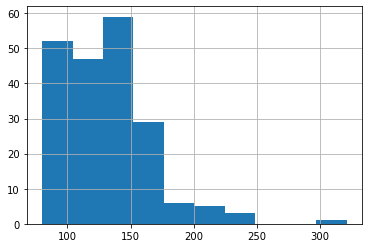

In [296]:
# On observe la répartition de la colonne durée_minutes
df_final['durée_minutes'].hist()

In [235]:
df[df["genre"].str.contains("Drama")]

,titres,date,mois de sortie,notes,durée,genre,acteurs,stroy_line,réalisateur,nombre de votes,users_reviews,metascore,budget,notes_proportionnelles,heures,min
0,Les Évadés,1994,March,9.3,222,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton",Chronicles the experiences of a formerly s...,Frank Darabont,2391766,Misery and Stand By Me were the best adaptatio...,80,"$25,000,000",93.0,2,22
1,Le parrain,1972,October,9.2,255,"Crime , Drama","Marlon Brando, Al Pacino, James Caan","The Godfather ""Don"" Vito Corleone is the h...",Francis Ford Coppola,1657092,It is now past 1 PM and I just finished watchi...,100,"$6,000,000",92.0,2,55
2,"Le parrain, 2ème partie",1974,August,9.0,322,"Crime , Drama","Al Pacino, Robert De Niro, Robert Duvall",The continuing saga of the Corleone crime ...,Francis Ford Coppola,1152130,"""The Godfather: Part II"" is a very suspenseful...",90,"$13,000,000",90.0,3,22
3,The Dark Knight : Le Chevalier noir,2008,August,9.0,232,"Action , Crime , Drama , Thriller","Christian Bale, Heath Ledger, Aaron Eckhart",Set within a year after the events of Batm...,Christopher Nolan,2353974,Totally one of the greatest movie titles ever ...,84,"$185,000,000",90.0,2,32
4,12 Hommes en colère,1957,September,9.0,136,"Crime , Drama","Henry Fonda, Lee J. Cobb, Martin Balsam",The defense and the prosecution have reste...,Sidney Lumet,705539,"I watched this film for the first time, when i...",96,"$350,000",90.0,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Anand,1971,March,8.3,22,"Drama , Musical","Rajesh Khanna, Amitabh Bachchan, Sumita Sanyal",Dr Bhaskar Bannerjee is not happy with his...,Hrishikesh Mukherjee,31616,Anand is the most impressive movie by the dire...,None,"INR3,000,000",83.0,2,2
246,Neon Genesis Evangelion: The End of Evangelion,1997,June,8.1,127,"Animation , Action , Drama , Fantasy , S...","Megumi Ogata, Megumi Hayashibara, Yûko Miyamura","After the defeat of the final Angel, Shinj...","Hideaki Anno, Kazuya Tsurumaki",41555,Never before has a movie put me through so man...,None,None,81.0,1,27
247,Les nuits de Cabiria,1957,October,8.1,150,Drama,"Giulietta Masina, François Périer, Franca Marzi",Practising the world's oldest profession i...,Federico Fellini,43862,"Federico Fellini, the genius of the Italian ci...",None,None,81.0,1,50
248,Le trone sanglant,1957,April,8.1,150,"Drama , History","Toshirô Mifune, Minoru Chiaki, Isuzu Yamada",After securing a major victory on the batt...,Akira Kurosawa,47710,"As much as I praise Mifune, it may well be Yam...",None,None,81.0,1,50
